## Practical Machine Learning : Customer Mall Visit Prediction
**Client : Publicis.Sapient**   
**Last Updated : 20-Feb-2019**   
**Version : 2.0**

### Content Structure :

- Problem Statement
- High Level Approach
    - Modeling 
    - Data Preperation
- Environment Details ( Steps to reproduce the results )
- Exploratory Data Analysis
- Feature Engineering
- Model Buidliing
- Performance Evaluation
- Model Tuning 
- Model Explanation


#### TODO LIST

- Check enviornment version 

### Problem Statement :

**Introduction**
The purpose of the exercise is to test the ability to develop and assess machine learning models. The goal is to create a model, propose evaluation metric and cross-validate it. The choice of the model is not that important and we don’t expect state-of-the-art accuracy (although we assume that candidate understands how model works and can explain it). Solution should be simple, but reasonable: candidate should be able to explain why it makes sense and how it is correlated to the business problem.

**Dataset**
Dataset (https://majidalfuttaim-my.sharepoint.com/:u:/g/personal/ahmed_sobih_maf_ae/EZZB8GQXpblP j4oTydkx97EBCNOb3W7-7dO0-3QrQynfBg?e=6B0QHg) provides information about shopping mall visits. Each line represents one customer - the first column contains unique customer identifier and the second column contains indices of the day when customer have visited the mall. The day with index 1 is a Monday (e. g. 7th is a Sunday, 8th is again a Monday). Indices are within a range of 1 to 1001 (which is equal to 143 full weeks). The task is to predict the first day of the next visit (week 144). For example, if customer will visit mall on Wednesday, then prediction should be equal to 3:

- 0: Customer will not visit on the next week 
- 1: Monday
- 2: Tuesday
- 3: Wednesday
- 4: Thursday 
- 5: Friday
- 6: Saturday 
- 7: Sunday

### High Level Approach :

#### Modeling Approach :

We have adopted hirearchical prediction approach using two levels.

- **Level 1:** 
    - First model will predict if the user will visit the mall next week or not. 
    - Binary Classification Model with two classes ( 0 and 1 )
- **Level 2:** 
    - If the output from previous model is true  (i.e. the visitor will visit the mall next week ) then second model will predict the day of the week the visitor will visit. 
    - Multi-class classification model with 7 classes ( 1-7 )

The prediction function will combine the results of level 1 and level 2 model and return final predictions. 

#### Data Preparation Approach

- **Training Data** : In order to create training data , we have used 3 weeks ( week 140, 141, 142 ) for generating the dataset. e.g. we already know who all visited in week number 140, So, we take visit in 140th week as output and rest of the visits as input. We are repeating the same process for 3 weeks to generate enough training data ( 3 x 300000 = 900000 data points in training )

- **Final Test Data** : Once the models are created , the final evaluation is done on week 143. 

- **Features Generated** : 
     - visit_number : how many visits so far
     - last_visit_dow : Last visit day of the week
     - mode_dow : Customer's mode of day of work of all visits
     - mean_day_diff : Average gap between visits in days 
     - median_day_diff : median of gap between visits in days 
     - last_2weeks_conscecutive_visit : has visitor visited in last 2 weeks consecutively 
     - perc_conscecutive_visits : percentage of consecutive visits ( weekly ) 
     - count_conscecutive_visits : count of consecutive visits ( weekly )
     - mean_week_diff : Average gap between visits in weeks 
     - median_week_diff : median of gap between visits in weeks 
     - num_visit_targetyear : number of visits in the current target year
     - num_visit_priortargetyear : number of visits in the previous  year
     - recency_week : how many weeks since the visitor has visited last
     - recency_day : how many days since the visitor has visited last
     - visit_sameweek_previousyears  : how many time visitor visited in the same week last year
     - count_visit_sameweek : how many time visitor visited in the same week 
     - count_visit_monday : how many time visitor visited on Monday
     - count_visit_tuesday : how many time visitor visited on Tuesday
     - count_visit_wednesday : how many time visitor visited on Wednesday
     - count_visit_thursday : how many time visitor visited on Thrusday
     - count_visit_friday : how many time visitor visited on Friday 
     - count_visit_saturday : how many time visitor visited on Saturday 
     - count_visit_sunday : how many time visitor visited on Sunday  
     - mode_last3visits :  in last 3 visits, which day the visitor visited most 
     - mode_last8weeks : in last 8 weeks, which day the visitor visited most 
     - mode_last4weeks : in last 4 weeks, which day the visitor visited most 
     - mode_last12weeks : in last 12 weeks, which day the visitor visited most 
     - weighted_mean_diff_days : weighted mean of difference in days
     - weighted_mean_diff_days_std :weighted std dev of difference in days
     - mode_alternate_even_dow : mode on even number of days 
     - mode_alternate_odd_dow : mode of odd number of day s
     - least_visit_dow : which day visitor visit least 
     - max_consecutive_visitdow : which day visitor visit consecutively 
     - count_consecutive_sunday : count of consecutive visit to sunday
     - count_consecutive_saturday : count of consecutive visit to saturday
     - count_consecutive_friday : count of consecutive visit to friday
     - count_consecutive_thursday : count of consecutive visit to thrusday
     - count_consecutive_wednesday : count of consecutive visit to wednesday
     - count_consecutive_tuesday : count of consecutive visit to tuesday
     - count_consecutive_monday : count of consecutive visit to monday
    
#### EDA Analysis 

- Distribution of visits based on weeks 
- Week wise trend of visit count 
- Year wise breakup of visits 
- Trend for each week day ( sunday - saturday )
- Decomposing time-series for trend, seasonality, random noise 
- Distributiion ( histograms, KDE plots, bar plots ) of all generated features 


#### Initial Results 

- **Level 1** - Modeling Algorithm : Random Forest ,  Model accuracy : 94.3%
- **Level 2** - Modeling Algorithm : Model accuracy : 90.5%

#### TODO 

- Calculate combined model performance 
- Fine-tuning models 
- Create final prediction file 


- Precision Recall Curve 
- 

#### Feedback 
- Thought process used in creation of Features, explain it.
- Why we added random forest why not deep learning, write the thought process.
- Should be detail enough to explain it offline.

### Enviornment Details 

### Exploratory Data Analysis 

#### Import Libaries

In [1]:
from __future__ import print_function
# common libraries
import os 
# data processing libraries
import pandas as pd
from pandas import Series
import numpy as np
from scipy import stats
import itertools
from itertools import groupby
import pickle
import time
import multiprocessing
from joblib import Parallel, delayed


# visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
palette = sns.color_palette('Paired', 10)

# Machine Learning Libaries 
from sklearn.model_selection import train_test_split

# For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from  sklearn.metrics  import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample

# Disable Warnings

import warnings
############SR
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# setting up default seed for reproducibility purpose
np.random.seed(1234)

In [3]:
# overwrite_data for training / final evaluation / submission preparation
overwrite_data = False

#### Import Data

In [4]:
# dataframe to store base data 
input_file_path = os.path.join(os.curdir,'data', 'raw', 'train_set.csv')
df = pd.read_csv(input_file_path, skiprows=1, header=None, names=['visitor_id','visits'])

In [5]:
# head of the data
df.head()

,visitor_id,visits
0,1,30 84 126 135 137 179 242 342 426 456 460 462...
1,2,24 53 75 134 158 192 194 211 213 238 251 305 ...
2,3,51 143 173 257 446 491 504 510 559 616 719 73...
3,4,1 20 22 92 124 149 211 335 387 390 406 460 48...
4,5,34 51 56 106 110 121 163 233 266 275 345 359 ...


In [6]:
# Number of visitors 
print("Number of visitors in the dataset : {0}".format(len(df)))

Number of visitors in the dataset : 300000


**Observation** :

- There are 300000 (0.3 Million visitors ) in the dataset 
- Along with the visitor ID, we have visit day info for each visitor
- Data pre-processing is required to generate insights and build machine learning models

#### Helper Functions

**common helper functions**

In [9]:
def convert_to_week(t):
    """Converts input to week

    Args:
        param1 (t): tupl.
    
    Returns:
        numeric: 
    """
    return np.ceil((t/7))

def convert_to_day(t):
    """Converts input to week

    Args:
        param1 (t): tupl.
    
    Returns:
        numeric: 
    """
    return(np.where(t%7 == 0, 7,t%7))

def convert_week_to_relative_year(t):
    """Converts input to relative month (assumption: week 1 is Year1)

    Args:
        param1 (t): tupl.
    
    Returns:
        numeric: 
    """
    return np.ceil(t/52)

def convert_week_to_relative_week(t):
    """Converts input to relative month (assumption: week 1 is Year1)

    Args:
        param1 (t): tupl.
    
    Returns:
        numeric: 
    """
    return np.where(t%52 == 0, 52, t%52)


def update_array(t, target_week):
    """Removes weeks larger than target week

    Args:
        param1 (t): tupl.
    
    Returns:
        array: 
    """
    y = np.where(convert_to_week(t)>=target_week)
    return np.delete(t, y)

def count_visit_day(t, daynum):
    """Counts the number ov visits for a day

    Args:
        param1 (t): tupl.
    
    Returns:
        array: 
    """
    t = convert_to_day(t)
    return sum(1 for x in t if x==daynum)

def mode_day_lastxvisits(t, x):
    """Customer's mode of day of work of last 3 visits

    Args:
        param1 (t): tupl.
        param2 (x): int
    
    Returns:
        string: 
    """
    tupl_week = convert_to_week(t)
    ix = np.where(tupl_week>=(max(tupl_week)-x))
    mode_dow = stats.mode(convert_to_day(t[ix]))[0][0]
    return dic[mode_dow]

def countminofarr(lst): 
    """returns count of occurences in array

    Args:
        param1 (t): tupl.
        param2 (x): int
    
    Returns:
        string: 
    """
    arr = []
    for i in range(1,8):
        count = 0
        for ele in lst: 
            if (ele == i): 
                count = count + 1
        arr.append(count)
    return arr.index(min(arr))+1

def count_consecutive_dow(t, x):
    """Returns count of consecutive X dows
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
    """

    s = convert_to_day(t).astype(str)
    groups = groupby(s)
    result = [(label, sum(1 for _ in group)) for label, group in groups]
    return sum(count for label, count in result if label == x and count>1)


**Feature Engineering - Helper Functions**

In [8]:
dic = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 

def visit_number(tupl):
    """Number of visits by customer

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    return len(tupl)

def last_visit_dow(tupl, target_week):
    """Last visit day of the week

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    last_visit_dow = convert_to_day(tupl[-1])
    return dic[int(last_visit_dow)]

def last_visit_weeknum(tupl, target_week):
    """Last visit weeknum 

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    last_visit_weeknum = convert_to_week(tupl[-1])
    return last_visit_weeknum


def mode_dow(tupl):
    """Customer's mode of day of work of all visits

    Args:
        param1 (tupl): tupl.
    
    Returns:
        string: 
    """
    mode_dow = stats.mode(convert_to_day(tupl))[0][0]
    return dic[mode_dow]

def mode_last3visits(tupl):
    """Customer's mode of day of work of last 3 visits

    Args:
        param1 (tupl): tupl.
    
    Returns:
        string: 
    """
    mode_dow = stats.mode(convert_to_day(tupl[-3:]))[0][0]
    return dic[mode_dow]

def mode_last4weeks(tupl):
    """Customer's mode of day of work of last one month

    Args:
        param1 (tupl): tupl.
    
    Returns:
        string: 
    """
    return mode_day_lastxvisits(tupl, 4)

def mode_last8weeks(tupl):
    """Customer's mode of day of work of last 2 months

    Args:
        param1 (tupl): tupl.
    
    Returns:
        string: 
    """
    return mode_day_lastxvisits(tupl, 8)


def mode_last12weeks(tupl):
    """Customer's mode of day of work of last 3 months

    Args:
        param1 (tupl): tupl.
    
    Returns:
        string: 
    """
    return mode_day_lastxvisits(tupl, 12)


def mean_day_diff(tupl):
    """average difference of last visits in days

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    return np.ceil(np.mean(np.ediff1d(tupl)))


def median_day_diff(tupl):
    """average difference of last visits in days

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    return np.ceil(np.median(np.ediff1d(tupl)))



def mean_week_diff(tupl):
    """average difference of last visits in days

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    return np.ceil(np.mean(np.ediff1d(convert_to_week(tupl))))


def median_week_diff(tupl):
    """average difference of last visits in days

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    return np.ceil(np.median(np.ediff1d(convert_to_week(tupl))))


def last_2weeks_conscecutive_visit(tupl):
    """Whether the customer visited consecutively in the last two weeks

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    
    last_visit_weeknum = convert_to_week(tupl[-1])
    two_weeks_prior = convert_to_week(tupl[-2])
    return np.where((last_visit_weeknum - two_weeks_prior)<=1, "Yes", "No")

def count_conscecutive_visits(tupl):
    """How many times customer visited in consecutive weeks out of total

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    
    weekdiff = np.ediff1d(convert_to_week(tupl))
    count_conscecutive_visits = (sum(1 for x in weekdiff if x==1))
    return count_conscecutive_visits


def perc_conscecutive_visits(tupl):
    """How many times customer visited in consecutive weeks out of total

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    weekdiff = np.ediff1d(convert_to_week(tupl))
    perc_conscecutive_visits = (sum(1 for x in weekdiff if x==1))/len(tupl)
    return perc_conscecutive_visits


def num_visit_targetyear(tupl, target_week):
    """Number of visits in Year1

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    target_year = convert_week_to_relative_year(target_week)
    tupl = convert_week_to_relative_year(convert_to_week(tupl))
    return sum(1 for x in tupl if x==target_year)

def num_visit_priortargetyear(tupl, target_week):
    """Number of visits in Year2

    Args:
        param1 (tupl): tupl.
    
    Returns:
        numeric: 
    """
    target_year = convert_week_to_relative_year(target_week)
    tupl = convert_week_to_relative_year(convert_to_week(tupl))
    return sum(1 for x in tupl if x==(target_year-1))

   
def recency_week(tupl, target_week):
    """Function to calclulate recency in weeks per visitor i.e. weeks difference since last visit from target visit week
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in weeks value
   
    """
    latest_visit_week_num = convert_to_week(tupl[-1])
    return int(target_week - latest_visit_week_num)
   
def recency_day(tupl, target_week):
    """Function to calclulate recency in days per visitor i.e. days difference since last visit from target visit week
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
   
    """
    return int(((target_week*7)-6) - int(tupl[-1]))

def visit_sameweek_previousyears(tupl, target_week):
    """Whethere visited same target week last week
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
   
    """
    tupl = convert_to_week(tupl)
    tupl_week = convert_week_to_relative_week(tupl)
    target_week = convert_week_to_relative_week(target_week)
    if target_week in tupl_week:
        return "Yes"
    else: return "No"

def count_visit_sameweek(tupl, target_week):
    """Whether visited same target week last week
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
   
    """
    tupl = convert_to_week(tupl)
    tupl_week = convert_week_to_relative_week(tupl)
    target_week = convert_week_to_relative_week(target_week)
    return sum(1 for x in tupl_week if x==target_week)


def count_visit_monday(tupl):
    """Count visited Monday
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
   
    """
    return count_visit_day(tupl, 1)

def count_visit_tuesday(tupl):
    """Count visited Tuesday
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
   
    """
    return count_visit_day(tupl, 2)

def count_visit_wednesday(tupl):
    """Count visited Wednesday
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
   
    """
    return count_visit_day(tupl, 3)

def count_visit_thursday(tupl):
    """Count visited Thursday
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
   
    """
    return count_visit_day(tupl, 4)

def count_visit_friday(tupl):
    """Count visited Friday
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
   
    """
    return count_visit_day(tupl, 5)

def count_visit_saturday(tupl):
    """Count visited Saturday
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
   
    """
    return count_visit_day(tupl, 6)

def count_visit_sunday(tupl):
    """Count visited Saturday
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : recency in days value
    """
    return count_visit_day(tupl, 7)

def output_binary(tupl, target_week = 143):
    """Creates binary output variable of whether the user visited the target week or not
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : binary
   
    """
    if target_week in convert_to_week(tupl):
        return 1
    else:
        return 0
    
def output_which_day(tupl, target_week):
    """Creates binary output variable of whether the user visited the target week or not
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    int : binary
    """
    if target_week in convert_to_week(tupl):
        return convert_to_day(tupl[-1])
    else:
        return 0

def least_visit_dow(tupl):
    """Calculates the least visit week by visitor
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int : binary
    """
    tupl = convert_to_day(tupl)
    least_dow = countminofarr(tupl)
    return dic[least_dow]    
        

def weighted_mean_diff_days(tupl, target_week):
    """Calculates weighted mean of difference in days
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
   
    """
    week_diff_with_target = target_week - convert_to_week(tupl)
    week_diff_consecutive = np.ediff1d(convert_to_week(tupl))
    
    if len(week_diff_consecutive) >= 7:
        weights = week_diff_with_target[-7:]
        weights = np.where(weights==0,1, weights) #If visitor has come in consecutive weeks, weights become 0 to be converted to 1
        last_7_visits_diff = week_diff_consecutive[:7]
    else:
        weights = week_diff_with_target[1:] #If visitor has come in consecutive weeks, weights become 0 to be converted to 1
        weights = np.where(weights==0,1, weights)
        last_7_visits_diff = week_diff_consecutive

    return np.mean(last_7_visits_diff/weights)

def weighted_mean_diff_days_std(tupl, target_week):
    """Calculates weighted mean of difference in days
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
   
    """
    week_diff_with_target = target_week - convert_to_week(tupl)
    week_diff_consecutive = np.ediff1d(convert_to_week(tupl))
    
    if len(week_diff_consecutive) >= 7:
        weights = week_diff_with_target[-7:]
        weights = np.where(weights==0,1, weights)
        last_7_visits_diff = week_diff_consecutive[:7]
    else:
        weights = week_diff_with_target[1:]
        weights = np.where(weights==0,1, weights)
        last_7_visits_diff = week_diff_consecutive
        
    return np.std(last_7_visits_diff/weights)

def mode_alternate_even_dow(tupl):
    """Calculates mode of even 
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
   
    """
    y = np.where(tupl%2 == 0)
    tupl = np.delete(tupl, y)
    return stats.mode(convert_to_day(tupl))[0][0]

def mode_alternate_odd_dow(tupl):
    """Calculates mode of even 
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
   
    """
    y = np.where(tupl%2 != 0)
    tupl = np.delete(tupl, y)
    return stats.mode(convert_to_day(tupl))[0][0]

def max_consecutive_visitdow(tupl):
    """Returns max of consecitive dow visit
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
    """
    s = convert_to_day(tupl)
    return (max(len(list(v)) for g,v in itertools.groupby(s)))

def count_consecutive_sunday(tupl):
    """Returns count of consecutive X dows
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
    """
    return count_consecutive_dow(tupl, '7.0')

def count_consecutive_saturday(tupl):
    """Returns count of consecutive X dows
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
    """
    return count_consecutive_dow(tupl, '6.0')
def count_consecutive_friday(tupl):
    """Returns count of consecutive X dows
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
    """
    return count_consecutive_dow(tupl, '5.0')
def count_consecutive_thursday(tupl):
    """Returns count of consecutive X dows
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
    """
    return count_consecutive_dow(tupl, '4.0')
def count_consecutive_wednesday(tupl):
    """Returns count of consecutive X dows
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
    """
    return count_consecutive_dow(tupl, '3.0')
def count_consecutive_tuesday(tupl):
    """Returns count of consecutive X dows
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
    """
    return count_consecutive_dow(tupl, '2.0')
def count_consecutive_monday(tupl):
    """Returns count of consecutive X dows
   
    Args:
    tuple : per visit tuple
   
    Returns:
    int :
    """
    return count_consecutive_dow(tupl, '1.0')

#### Data Pre-Processing Functions

In [9]:
def preprocess(row, target_week, is_output_available=True):
    """Converts input array to float and removes weeks greater than target week
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    Dictionary
   
    """

    visitor_id = row['visitor_id']
    tup = visits = [visit.strip() for visit in str(row['visits']).split()] 
    ori_tup = np.array([float(i)for i in tup])
    tup = update_array(ori_tup, target_week)
    
    feature_dic = {
                    'visitor_id' : visitor_id,
                    'visit_number': visit_number(tup),
                   'last_visit_dow': last_visit_dow(tup,target_week), 
                   'mode_dow': mode_dow(tup),
#                    'last_visit_weeknum':last_visit_weeknum(tup,target_week),
                   'mean_day_diff':mean_day_diff(tup),
                   'median_day_diff':median_day_diff(tup),
                   'last_2weeks_conscecutive_visit':last_2weeks_conscecutive_visit(tup),
                   'perc_conscecutive_visits':perc_conscecutive_visits(tup), 
                   'count_conscecutive_visits':count_conscecutive_visits(tup),
                   'mean_week_diff':mean_week_diff(tup),
                   'median_week_diff':median_week_diff(tup),
                   'num_visit_targetyear':num_visit_targetyear(tup, target_week),
                   'num_visit_priortargetyear':num_visit_priortargetyear(tup, target_week),
                   'recency_week':recency_week(tup, target_week),
                   'recency_day':recency_day(tup, target_week),
                   'visit_sameweek_previousyears':visit_sameweek_previousyears(tup, target_week),
                   'count_visit_sameweek':count_visit_sameweek(tup, target_week),
                   'count_visit_monday':count_visit_monday(tup),
                   'count_visit_tuesday':count_visit_tuesday(tup),
                   'count_visit_wednesday':count_visit_wednesday(tup),
                   'count_visit_thursday':count_visit_thursday(tup),
                   'count_visit_friday':count_visit_friday(tup),
                   'count_visit_saturday':count_visit_saturday(tup),
                   'count_visit_sunday':count_visit_sunday(tup),
                   'mode_last3visits':mode_last3visits(tup),
                   'mode_last8weeks':mode_last8weeks(tup),
                   'mode_last4weeks':mode_last4weeks(tup),
                   'mode_last12weeks':mode_last12weeks(tup),
                   'weighted_mean_diff_days':weighted_mean_diff_days(tup, target_week),
                   'weighted_mean_diff_days_std':weighted_mean_diff_days_std(tup, target_week),
                   'mode_alternate_even_dow':mode_alternate_even_dow(tup),
                   'mode_alternate_odd_dow':mode_alternate_odd_dow(tup),
                   'least_visit_dow':least_visit_dow(tup),
                   'max_consecutive_visitdow':max_consecutive_visitdow(tup),
                   'count_consecutive_sunday':count_consecutive_sunday(tup),
                   'count_consecutive_saturday':count_consecutive_saturday(tup),
                   'count_consecutive_friday':count_consecutive_friday(tup),
                   'count_consecutive_thursday':count_consecutive_thursday(tup),
                   'count_consecutive_wednesday':count_consecutive_wednesday(tup),
                   'count_consecutive_tuesday':count_consecutive_tuesday(tup),
                   'count_consecutive_monday':count_consecutive_monday(tup),
                   
                  }
    
    if is_output_available:
        feature_dic['output_binary'] = output_binary(ori_tup, target_week = target_week)
        feature_dic['output_which_day'] = output_which_day(ori_tup, target_week = target_week)

    return feature_dic
    

def create_vars(row, target_week, is_output_available):
    """Call prepross at a visitor_id level
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    Dictionary
   
    """
    return preprocess(row, target_week)

    
def apply_preprocess(df,target_week,is_output_available):
    
    result = df.apply(lambda row : create_vars(row,target_week, is_output_available), axis=1)
    return list(result.values)


def prepare_data(df,target_weeks,is_output_available=True):
    # creating dataset for each target week in parallel using multiple cores 
    num_cores = int(multiprocessing.cpu_count()) - 2  # using cores in parrallel

    # running the pre-processing in parallel for each target week
    result = Parallel(n_jobs=num_cores)(delayed(apply_preprocess)(df,target_week, is_output_available) for target_week in target_weeks)

    # flatten the list 
    merged = list(itertools.chain(*result))
    
    # dataframe 
    df_temp = pd.DataFrame(merged)
    return df_temp
    

### Data Preparation 

**Training Data**:

Three weeks ( week no 140, 141, 142 ) dataset are used to create training dataset. 

In [10]:
train_file_path = os.path.join(os.curdir,'data', 'processed', 'df_ml_train.pkl')

df_ml_train = None 
if overwrite_data == True:
    print("creating pre-procesed data for the target weeks")
    # target weeks 
    target_weeks = [140,141,142]
    df_ml_train = prepare_data(df,target_weeks)
    df_ml_train.info()
    # saving the dataset ( in binary pickle format to reduce size , could have been saved to CSV file too.)
    df_ml_train.to_pickle(train_file_path)
else:
    print("loading existing pre-procesed data")
    with open(train_file_path, 'rb') as f:
        df_ml_train = pickle.load(f)
    df_ml_train.info()

loading existing pre-procesed data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 43 columns):
count_conscecutive_visits         900000 non-null int64
count_consecutive_friday          900000 non-null int64
count_consecutive_monday          900000 non-null int64
count_consecutive_saturday        900000 non-null int64
count_consecutive_sunday          900000 non-null int64
count_consecutive_thursday        900000 non-null int64
count_consecutive_tuesday         900000 non-null int64
count_consecutive_wednesday       900000 non-null int64
count_visit_friday                900000 non-null int64
count_visit_monday                900000 non-null int64
count_visit_sameweek              900000 non-null int64
count_visit_saturday              900000 non-null int64
count_visit_sunday                900000 non-null int64
count_visit_thursday              900000 non-null int64
count_visit_tuesday               900000 non-null int64
count_visit_we

**Final Evaluation Data**

Week No#143 has been used to create the final evaluation data and generate final combined models performance. 

In [11]:
final_evaluation_file_path = os.path.join(os.curdir,'data', 'processed', 'df_ml_final_evaluation.pkl')

df_ml_final_evaluation = None 
if overwrite_data == True:
    print("creating pre-procesed data for the target weeks")
    # target weeks 
    target_weeks = [143]
    df_ml_final_evaluation = prepare_data(df,target_weeks)
    df_ml_final_evaluation.info()
    # saving the dataset ( in binary pickle format to reduce size , could have been saved to CSV file too.)
    df_ml_final_evaluation.to_pickle(final_evaluation_file_path)
else:
    print("loading existing pre-procesed data")
    with open(final_evaluation_file_path, 'rb') as f:
        df_ml_final_evaluation = pickle.load(f)
    df_ml_final_evaluation.info()

loading existing pre-procesed data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 43 columns):
count_conscecutive_visits         300000 non-null int64
count_consecutive_friday          300000 non-null int64
count_consecutive_monday          300000 non-null int64
count_consecutive_saturday        300000 non-null int64
count_consecutive_sunday          300000 non-null int64
count_consecutive_thursday        300000 non-null int64
count_consecutive_tuesday         300000 non-null int64
count_consecutive_wednesday       300000 non-null int64
count_visit_friday                300000 non-null int64
count_visit_monday                300000 non-null int64
count_visit_sameweek              300000 non-null int64
count_visit_saturday              300000 non-null int64
count_visit_sunday                300000 non-null int64
count_visit_thursday              300000 non-null int64
count_visit_tuesday               300000 non-null int64
count_visit_we

**Preparing Input for Final Submission on Week 144**

In [12]:
final_submission_file_path = os.path.join(os.curdir,'data', 'processed', 'df_ml_submission.pkl')

df_ml_submission = None 
if overwrite_data == True:
    print("creating pre-procesed data for the target weeks")
    # target weeks 
    target_weeks = [144]
    df_ml_submission = prepare_data(df,target_weeks, False)
    df_ml_submission.info()
    # saving the dataset ( in binary pickle format to reduce size , could have been saved to CSV file too.)
    df_ml_submission.to_pickle(final_submission_file_path)
else:
    print("loading existing pre-procesed data")
    with open(final_submission_file_path, 'rb') as f:
        df_ml_submission = pickle.load(f)
    df_ml_submission.info()


loading existing pre-procesed data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 43 columns):
count_conscecutive_visits         300000 non-null int64
count_consecutive_friday          300000 non-null int64
count_consecutive_monday          300000 non-null int64
count_consecutive_saturday        300000 non-null int64
count_consecutive_sunday          300000 non-null int64
count_consecutive_thursday        300000 non-null int64
count_consecutive_tuesday         300000 non-null int64
count_consecutive_wednesday       300000 non-null int64
count_visit_friday                300000 non-null int64
count_visit_monday                300000 non-null int64
count_visit_sameweek              300000 non-null int64
count_visit_saturday              300000 non-null int64
count_visit_sunday                300000 non-null int64
count_visit_thursday              300000 non-null int64
count_visit_tuesday               300000 non-null int64
count_visit_we

#### Data Processing for Basic Exploratory Data Analysis

**Melting rows for extracting basic insights**

In [5]:
# Melting rows for extracting basic insights 
df2 = pd.concat([Series(row['visitor_id'], row['visits'].split(' '))              
                    for _, row in df.iterrows()]).reset_index()
df2.columns = ['visit_num','visitor_id']
df2 = df2[df2['visit_num'] != '']
df2['visit_num'] = df2['visit_num'].astype(float)
df2.reset_index(drop=True,inplace=True)
df2.head()

,visit_num,visitor_id
0,30.0,1
1,84.0,1
2,126.0,1
3,135.0,1
4,137.0,1


#### Deriving week number from visit number

In [10]:
df2['week_num'] = (df2['visit_num']/7).apply(np.ceil)
x = df2['visit_num'].map(lambda x: convert_week_to_relative_week(x))


KeyboardInterrupt: 

#### Analysis of indivdual years and trends



In [15]:
### For analysis of each individual year we are dividing the source data frame into years
df_year_1=df2.loc[df2['week_num']<53].copy()
df_year_1.reset_index(drop=True,inplace=True)
df_year_2=df2.loc[(df2['week_num']>52) & (df2['week_num']<105)].copy()
df_year_2.reset_index(drop=True,inplace=True)
df_year_3=df2.loc[(df2['week_num']>104)].copy()
df_year_3.reset_index(drop=True,inplace=True)
df_year_1.head()

,visit_num,visitor_id,week_num
0,30.0,1,5.0
1,84.0,1,12.0
2,126.0,1,18.0
3,135.0,1,20.0
4,137.0,1,20.0


In [16]:
# Creating week_index for the each of the individual year come at the same relative index
df_year_1['week_index']=df_year_1['week_num']
df_year_2['week_index']=df_year_2['week_num']-52
df_year_3['week_index']=df_year_3['week_num']-104
df_year_1['year']=1
df_year_2['year']=2
df_year_3['year']=3

In [17]:
count1=df_year_1.groupby('week_index').count()['week_num']
count2=df_year_2.groupby('week_index').count()['week_num']
count3=df_year_3.groupby('week_index').count()['week_num']


In [18]:
average_week=pd.DataFrame((count1+count2)/2)

#### First we will look at the box plot of count of visit in individual weeks.


Text(0, 0.5, 'count of visits')

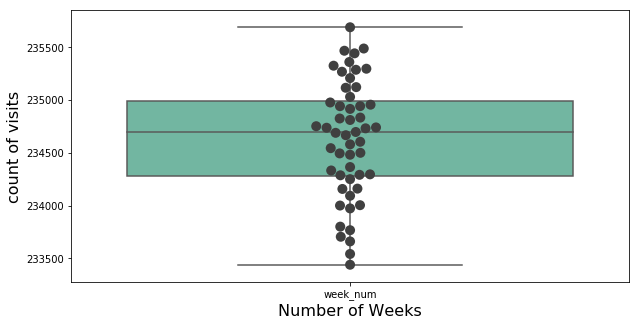

In [19]:
#average_week.boxplot()
plt.figure(figsize = (10, 5))
ax = sns.boxplot(data=average_week, palette="Set2")
ax = sns.swarmplot(data=average_week,color=".25", size=10)
ax.set_xlabel('Number of Weeks',fontsize=16)
ax.set_ylabel('count of visits',fontsize=16)
#ax.set_title('',fontsize=22)

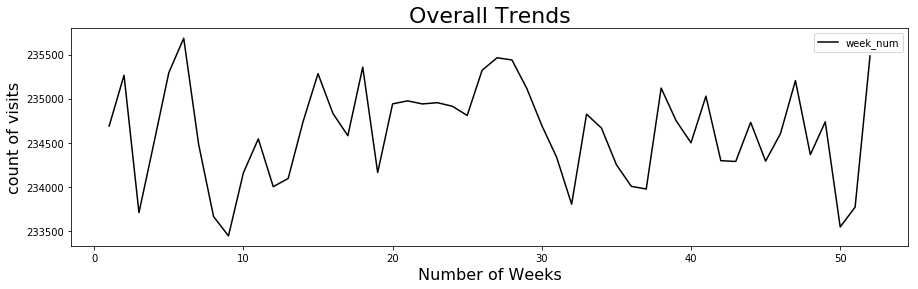

In [20]:
f, ax=plt.subplots(1,1, figsize=(15,4))
average_week.plot(kind='line', ax=ax, cmap='inferno');
ax.set_xlabel('Number of Weeks',fontsize=16)
ax.set_ylabel('count of visits',fontsize=16)
ax.set_title('Overall Trends',fontsize=22);

In [21]:
average_week.describe()

,week_num
count,52.000000
mean,234626.663462
std,552.954859
min,233441.000000
25%,234277.375000
50%,234692.000000
75%,234988.250000
max,235686.000000


**Observations**

- Based on boxplot and line plot number varies from **233441 to 235686** and there is not a very huge difference between week with lowest count and week with highest count
- Also the visit counts seems to be uniformly distributed with low interquartile range (IQR) from 234277 to 234988


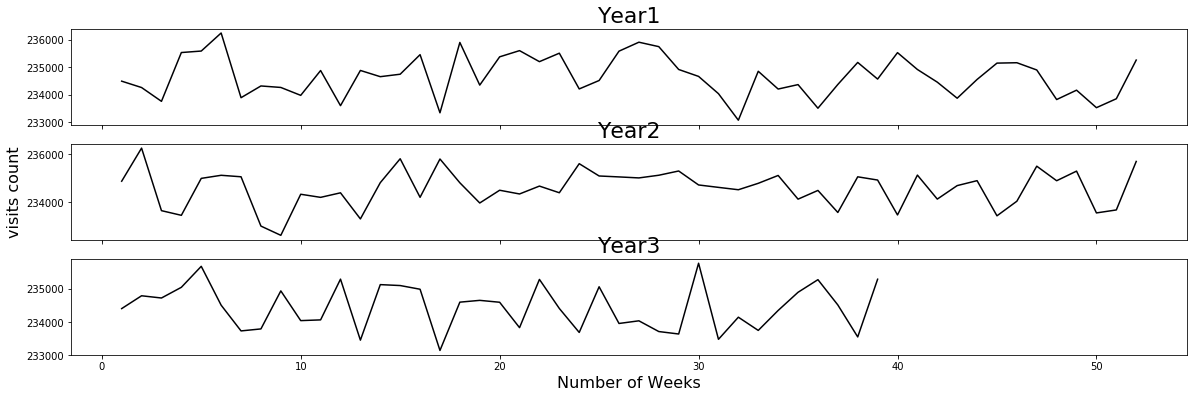

In [22]:
# Plot for analyzing individual years
f, ax=plt.subplots(3,1, sharex=True, figsize=(20,6))
count1.plot(kind='line', ax=ax[0], cmap='inferno')
count2.plot(kind='line', ax=ax[1], cmap='inferno')
count3.plot(kind='line', ax=ax[2], cmap='inferno')
ax[0].set_title('Year1',fontsize=22)
ax[1].set_ylabel('visits count',fontsize=16)
ax[1].set_xlabel('Number of Weeks',fontsize=16)
#ax[1].set_ylabel('count of visits')
ax[1].set_title('Year2',fontsize=22)
ax[2].set_xlabel('Number of Weeks',fontsize=16)
#ax[2].set_ylabel('count of visits')
ax[2].set_title('Year3',fontsize=22);


**Observations** 

- Though all 3 plots are distinct, but overall we can see some similarity in the spikes which is an indiction of presence of some seasonality in the data 

In [23]:
# Plotting for analyzing distribution for individual week days
# Concatenating the Data
df_concat = df_year_1.append(df_year_2)

In [24]:
df_concat.reset_index(drop=True,inplace=True)
df_concat.tail()

,visit_num,visitor_id,week_num,week_index,year
24401168,711.0,300000,102.0,50.0,2
24401169,712.0,300000,102.0,50.0,2
24401170,713.0,300000,102.0,50.0,2
24401171,724.0,300000,104.0,52.0,2
24401172,726.0,300000,104.0,52.0,2


In [25]:
df_concat['dayofweek'] = 7-((7*df_concat['week_num'])- df_concat['visit_num'])
dic = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'} 
df_concat = df_concat.replace({"dayofweek": dic})

In [26]:
df_concat.head()

,visit_num,visitor_id,week_num,week_index,year,dayofweek
0,30.0,1,5.0,5.0,1,Tuesday
1,84.0,1,12.0,12.0,1,Sunday
2,126.0,1,18.0,18.0,1,Sunday
3,135.0,1,20.0,20.0,1,Tuesday
4,137.0,1,20.0,20.0,1,Thursday


In [27]:
# logic for looking at average distribution for each week day
df_week=pd.DataFrame()
for i in df_concat.dayofweek.unique():
    df_day_1=df_concat[(df_concat.dayofweek==i) & (df_concat.year==1)].copy()
    df_day_2=df_concat[(df_concat.dayofweek==i) & (df_concat.year==2)].copy()
    df_1day=pd.DataFrame(((df_day_1.groupby(['week_index']).count()['visit_num'])+(df_day_2.groupby(['week_index']).count()['visit_num']))/2).rename(index=str, columns={"visit_num":i})
    #df_week=pd.DataFrame(index=df_1day.index.copy())
    
    if(len(df_week)>1):
        df_week=df_week.merge(df_1day,left_index=True, right_index=True, how='inner')
    else:
        df_week=df_1day.copy()


In [28]:
df_week.head()

,Tuesday,Sunday,Thursday,Saturday,Wednesday,Friday,Monday
week_index,,,,,,,
1.0,21552.0,53563.5,26115.5,49658.5,24077.5,30535.5,29185.5
2.0,21504.5,53997.5,26132.0,49453.0,24202.0,30960.0,29016.5
3.0,21304.0,53933.0,25783.0,49537.5,24143.5,30189.0,28815.5
4.0,21268.5,53686.0,25965.0,49479.5,24412.5,30651.0,29031.0
5.0,21537.0,53680.0,26443.5,49771.5,24074.0,30795.0,28993.0


In [29]:
df_week = df_week[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

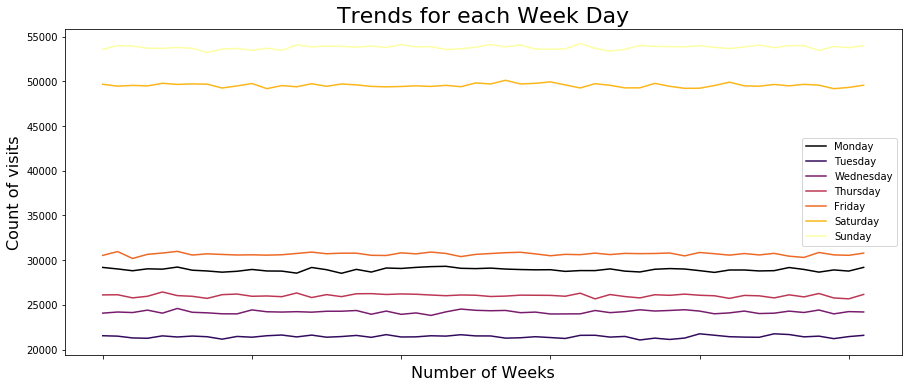

In [30]:
f, ax=plt.subplots(1,1, figsize=(15,6))
df_week.plot(kind='line', ax=ax, cmap='inferno')
ax.set_xlabel('Number of Weeks',fontsize=16)
ax.set_ylabel('Count of visits',fontsize=16)
ax.set_title('Trends for each Week Day',fontsize=22);


**Observations**

- As expected **weekends ( saturday and sunday )** gather lot more visits and give us an indication for creating the features that utilize imortance of weekends

#### Seasionality Check

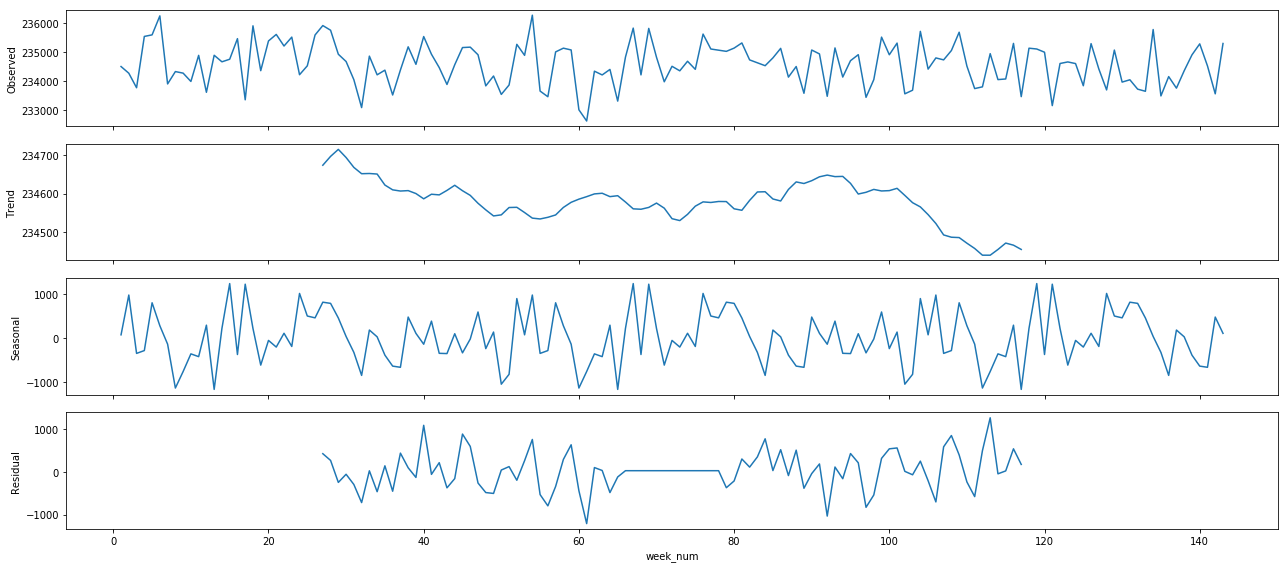

In [31]:
#additive
from statsmodels.tsa.seasonal import seasonal_decompose
#series = pvt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
result = seasonal_decompose(df2.groupby('week_num').count()['visitor_id'], model='additive',freq=52)
#plt.figure(figsize=(20,10))
result.plot()
plt.show()

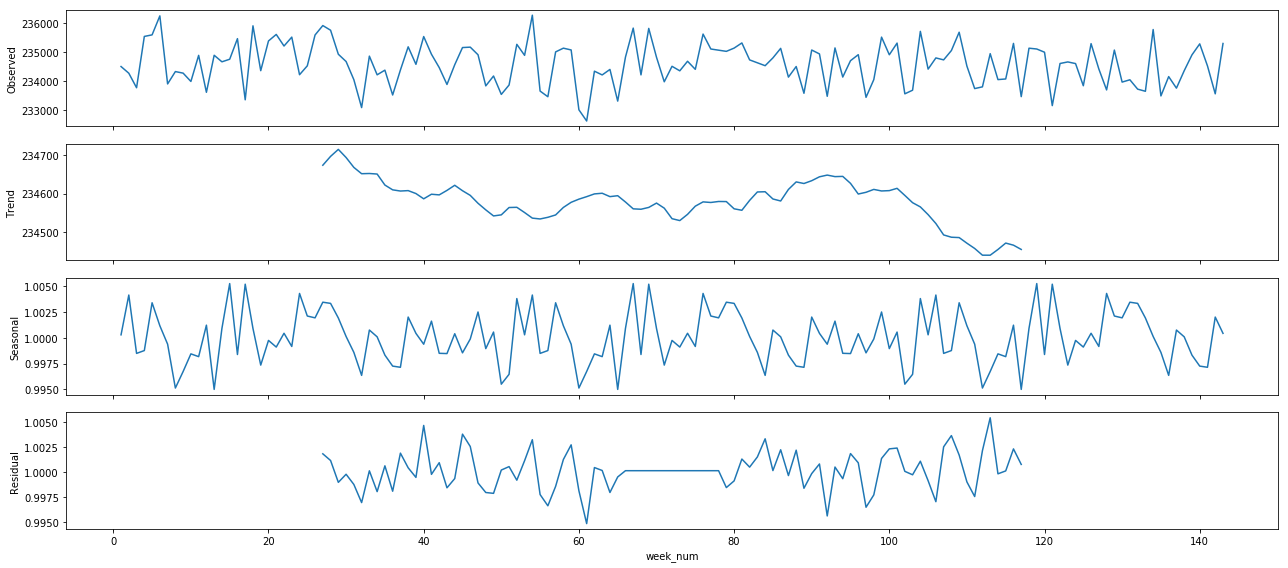

In [32]:
#multiplicative

from statsmodels.tsa.seasonal import seasonal_decompose
#series = pvt
rcParams['figure.figsize'] = 18, 8
result = seasonal_decompose(df2.groupby('week_num').count()['visitor_id'], model='multiplicative',freq=52)
#plt.figure(figsize=(20,10))
result.plot()
plt.show()

**Observations**

- We are getting similar results using both additive and multiplicative decompositions.
- Overall **trend** is getting down
- It is quite clear that some seasionality present in our data and we can focus more on creating seasional features

<a id='the_destination'></a>

### EDA on Pre-Processed Training Data

<a id='the_destination'></a>

#### Describe Data

In [33]:
# basic manipulation of columns before running describe
df_ml_train['output_which_day'] = df_ml_train['output_which_day'].astype('int64')
df_ml_train['last_2weeks_conscecutive_visit'] = df_ml_train['last_2weeks_conscecutive_visit'].astype('str')
pd.options.display.max_columns = None
df_ml_train.describe()

,count_conscecutive_visits,count_consecutive_friday,count_consecutive_monday,count_consecutive_saturday,count_consecutive_sunday,count_consecutive_thursday,count_consecutive_tuesday,count_consecutive_wednesday,count_visit_friday,count_visit_monday,count_visit_sameweek,count_visit_saturday,count_visit_sunday,count_visit_thursday,count_visit_tuesday,count_visit_wednesday,max_consecutive_visitdow,mean_day_diff,mean_week_diff,median_day_diff,median_week_diff,mode_alternate_even_dow,mode_alternate_odd_dow,num_visit_priortargetyear,num_visit_targetyear,output_binary,output_which_day,perc_conscecutive_visits,recency_day,recency_week,visit_number,visitor_id,weighted_mean_diff_days,weighted_mean_diff_days_std
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.00000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.00000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,45.166607,2.574381,2.340259,7.064026,8.327552,1.839857,1.806333,1.78562,14.321841,13.495461,1.562439,23.102097,25.100458,12.147212,10.011054,11.291611,3.259288,10.632624,1.900863,7.390508,1.143228,5.254973,5.247566,40.66116,28.132491,0.553242,2.824301,0.393644,9.399966,1.916688,109.469734,150000.500000,0.412912,0.477338
std,22.058013,2.982535,2.715489,6.943253,7.764709,2.311797,2.885863,2.47218,8.320258,7.291904,1.269902,13.857990,14.587084,6.811031,7.598841,6.645251,0.980624,3.781012,0.656437,2.734354,0.364942,2.044635,2.033412,15.46007,11.024097,0.497157,2.925254,0.072718,10.786963,1.496392,39.854916,86602.588491,0.287036,0.434959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.00000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,22.000000,1.000000,0.015922,0.015020
25%,27.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.00000,8.000000,8.000000,1.000000,12.000000,13.000000,7.000000,4.000000,6.000000,3.000000,7.000000,1.000000,5.000000,1.000000,4.000000,4.000000,28.00000,19.000000,0.000000,0.000000,0.346154,2.000000,1.000000,77.000000,75000.750000,0.221429,0.210224
50%,41.000000,2.000000,2.000000,5.000000,6.000000,2.000000,0.000000,0.00000,13.000000,13.000000,1.000000,21.000000,23.000000,11.000000,8.000000,10.000000,3.000000,10.000000,2.000000,7.000000,1.000000,6.000000,6.000000,38.00000,26.000000,1.000000,2.000000,0.404040,6.000000,1.000000,101.000000,150000.500000,0.339796,0.340268
75%,62.000000,4.000000,4.000000,10.000000,12.000000,3.000000,2.000000,2.00000,20.000000,18.000000,2.000000,33.000000,36.000000,16.000000,15.000000,15.000000,4.000000,13.000000,2.000000,9.000000,1.000000,7.000000,7.000000,52.00000,36.000000,1.000000,6.000000,0.448276,13.000000,2.000000,140.000000,225000.250000,0.520635,0.633251
max,119.000000,30.000000,27.000000,54.000000,61.000000,23.000000,29.000000,25.00000,58.000000,48.000000,10.000000,80.000000,80.000000,46.000000,54.000000,50.000000,19.000000,43.000000,6.000000,37.000000,5.000000,7.000000,7.000000,103.00000,77.000000,1.000000,7.000000,0.630435,204.000000,30.000000,257.000000,300000.000000,5.181406,8.622196


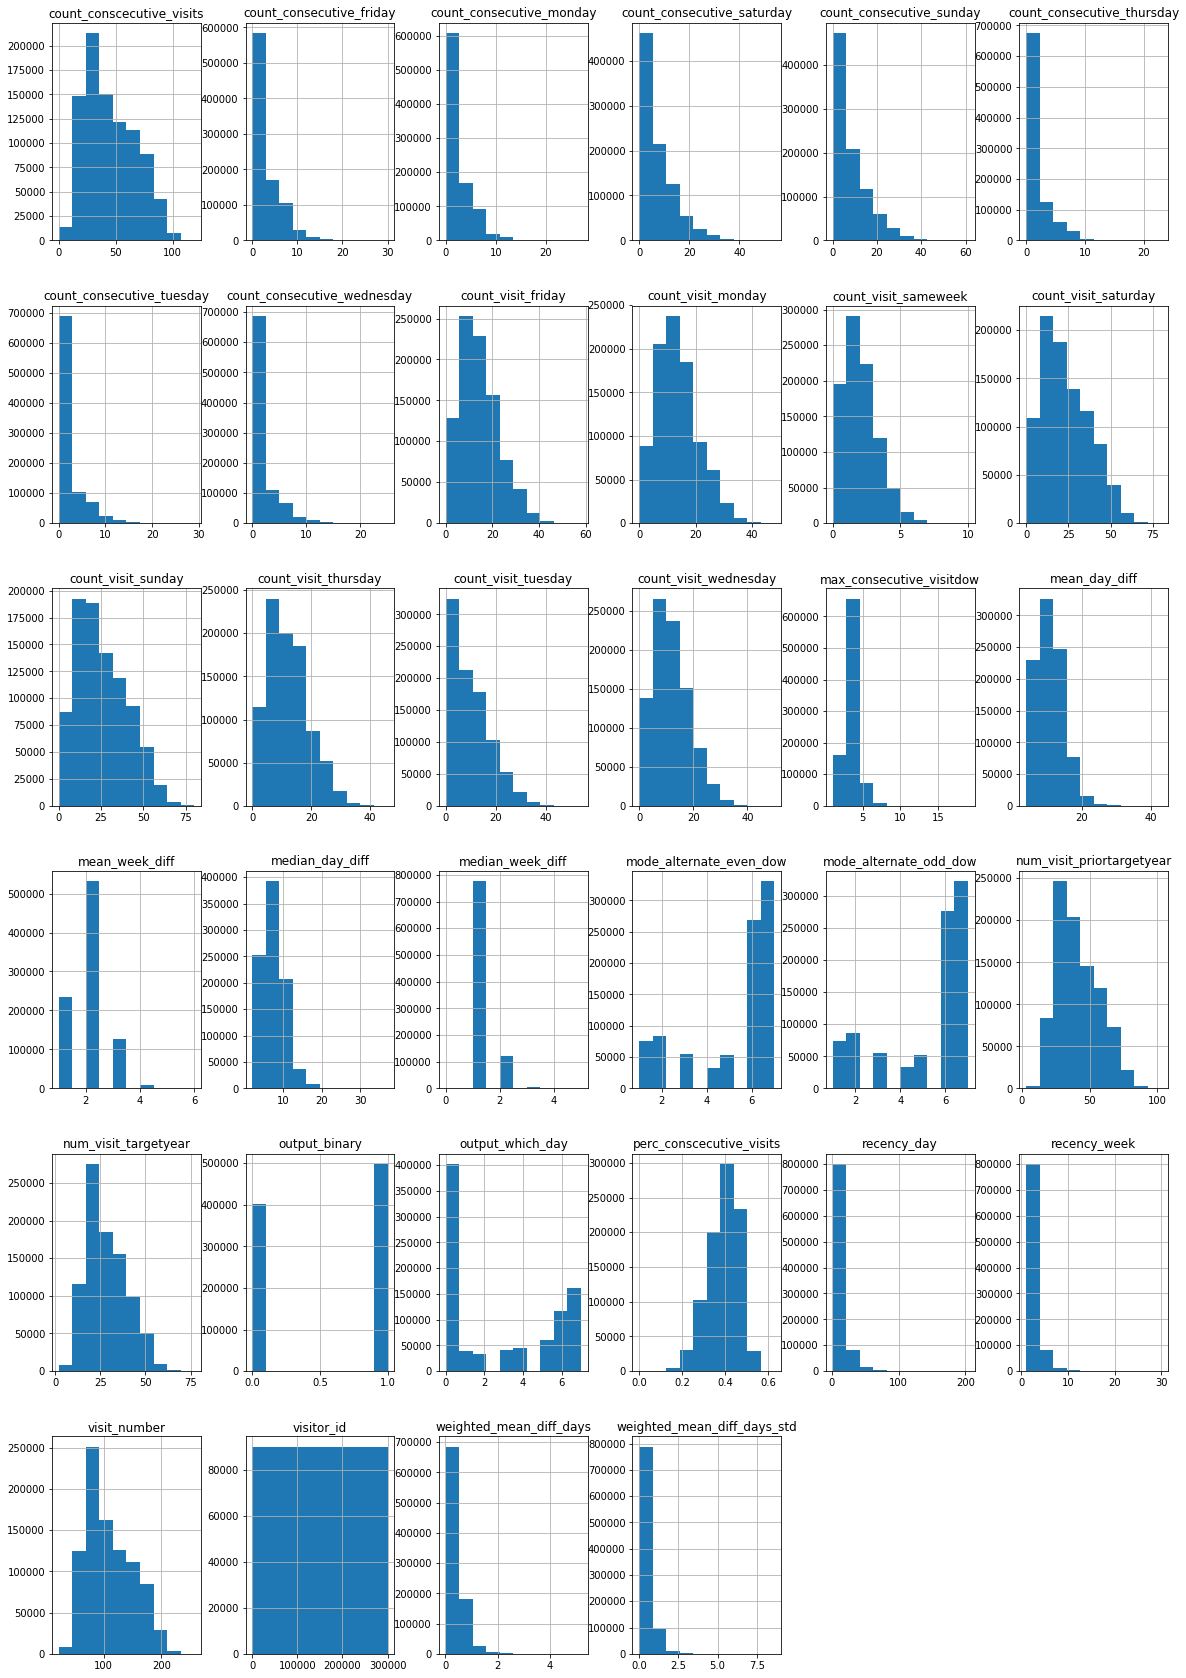

In [34]:
# Plotting histogram of individual features
rcParams['font.size'] = 10
df_ml_train.hist(figsize=(20,30));

**Obseravations**

- Histograms seems fine and atleast there is no visible anomaly with the prepared data

In [35]:
# checking second model target variable
df_ml_train.output_which_day.value_counts(normalize=True, ascending=True)

2    0.037998
1    0.043784
3    0.045230
4    0.050774
5    0.066571
6    0.129313
7    0.179571
0    0.446758
Name: output_which_day, dtype: float64

#### Visualizing newly created predictor variables that seems be significant by their definition

In [36]:
# Creating subset df_day which will be use for visualizing second model output
df_ml_train_day=df_ml_train[df_ml_train.output_binary==1].copy()
df_ml_train_day.reset_index(drop=True,inplace=True)

In [37]:
color_mapping = {fare_bin: palette[i] for i, fare_bin in enumerate(df_ml_train['output_binary'].unique())}
df_ml_train['color_binary'] = df_ml_train['output_binary'].map(color_mapping)
color_mapping_day = {fare_bin: palette[i] for i, fare_bin in enumerate(df_ml_train_day['output_which_day'].unique())}
df_ml_train_day['color_day'] = df_ml_train_day['output_which_day'].map(color_mapping_day)

In [38]:
# Function for plotiing kdeplot for both the models
def kdeplot(df, df_day,var):
    # Calculate distribution by each fare bin
    #plt.figure(figsize = (12, 4))
    f, axes = plt.subplots(1, 2,figsize=(20,4))

    for f, grouped in df.groupby('output_binary'):
        sns.kdeplot(grouped[var], label = f'{f}', color = list(grouped['color_binary'])[0],ax=axes[0])

    for f, grouped in df_day.groupby('output_which_day'):
        sns.kdeplot(grouped[var], label = f'{f}', color = list(grouped['color_day'])[0],ax=axes[1])

    #axes[0].set_xlabel('common xlabel')
    #axes.set_xlabel('common xlabel')
    #axes[0].fig_size(5,5)
    axes[0].set_xlabel(var,fontsize=18)
    axes[0].set_ylabel('density',fontsize=18)
    axes[0].set_title('KDE Plot for Model1',fontsize=22)

    axes[1].set_xlabel(var,fontsize=18)
    axes[1].set_ylabel('density',fontsize=18)
    axes[1].set_title('KDE Plot for Model2',fontsize=22);
    plt.show()

#### Visualizing : count_conscecutive_visits

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


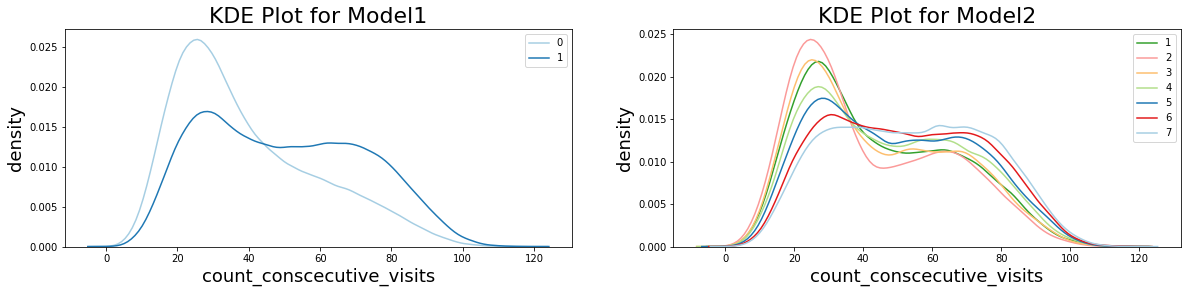

In [39]:
kdeplot(df_ml_train,df_ml_train_day,'count_conscecutive_visits');

**Observatioins:** 

- Based on the density distribution for Model1 and Model2. **count_conscecutive_visits** looks like a good candidate as it exhbit different density distribution for both models output.

#### Visualizing : num_visit_targetyear

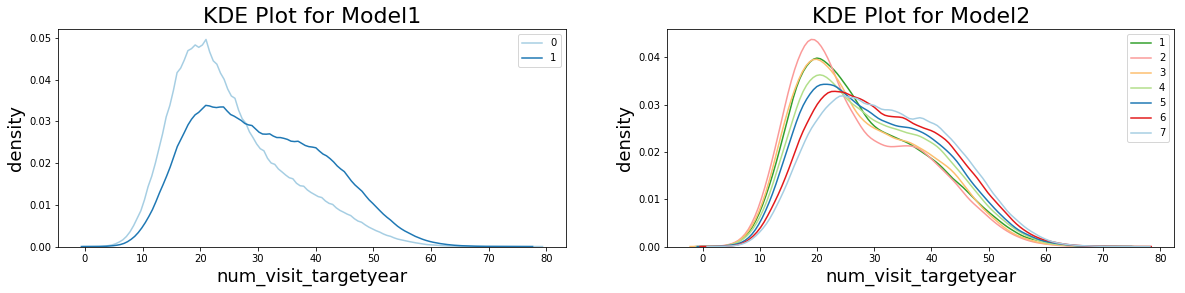

In [40]:
kdeplot(df_ml_train,df_ml_train_day,'num_visit_targetyear');

**Obseravtions:** 

- As expected number of visit target year seems like an important variable. In reality a person mall visits is usually govern by his frequency. If a person has already visited malls multiple times there is a less chance he will visit again next week.

#### Visualizing : visit_number

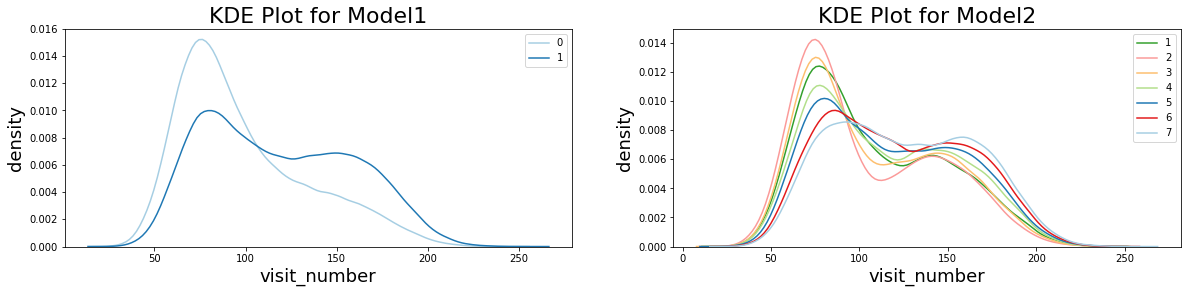

In [41]:
kdeplot(df_ml_train,df_ml_train_day,'visit_number');

**Observation:** 

- Total visit is also an important variable.In reality a person mall visits is usually govern by his frequency. If a person has already visited malls multiple times there is a less chance he will visit again next week.

#### Visualizing : mean_day_diff

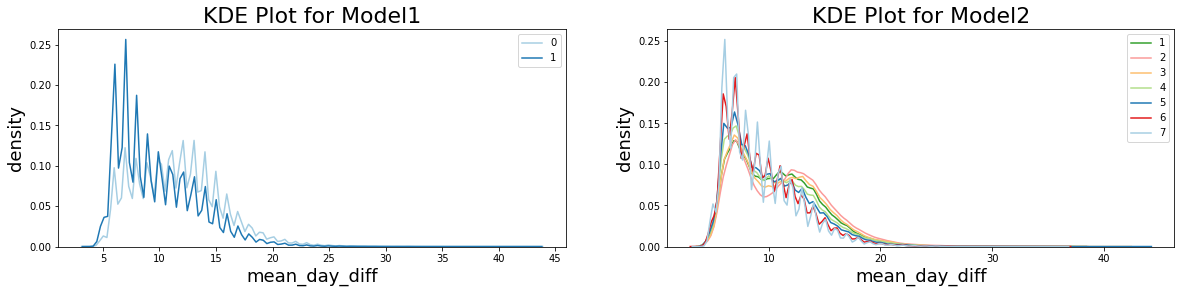

In [42]:
kdeplot(df_ml_train,df_ml_train_day,'mean_day_diff');

**Observation:** 

- mean_day_diff exhibits significant variation for all the output classes. Seems to be a potential candidate

#### Visualizing : last_2weeks_conscecutive_visit

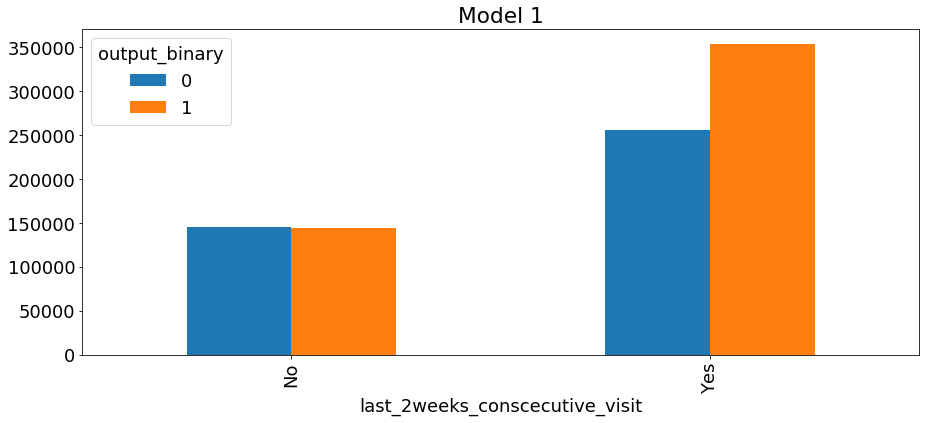

In [43]:
rcParams['figure.figsize'] = 15, 6
rcParams['font.size'] = 18

pd.crosstab(df_ml_train.last_2weeks_conscecutive_visit,df_ml_train.output_binary).plot.bar(title='Model 1');

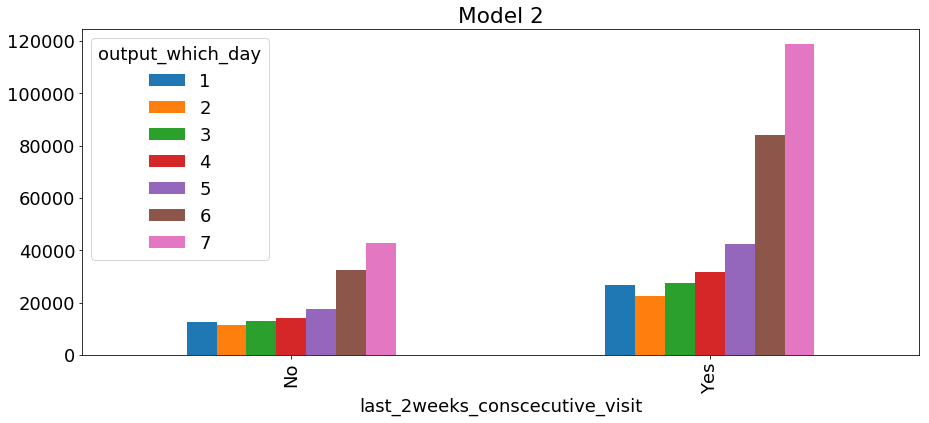

In [44]:
pd.crosstab(df_ml_train_day.last_2weeks_conscecutive_visit,df_ml_train_day.output_which_day).plot.bar(title='Model 2');

**Observation:** 

- **last_2weeks_conscecutive_visit** exhibits affinity towards output class and seems to be a good predictor

#### Visualizing : weighted_mean_diff_days

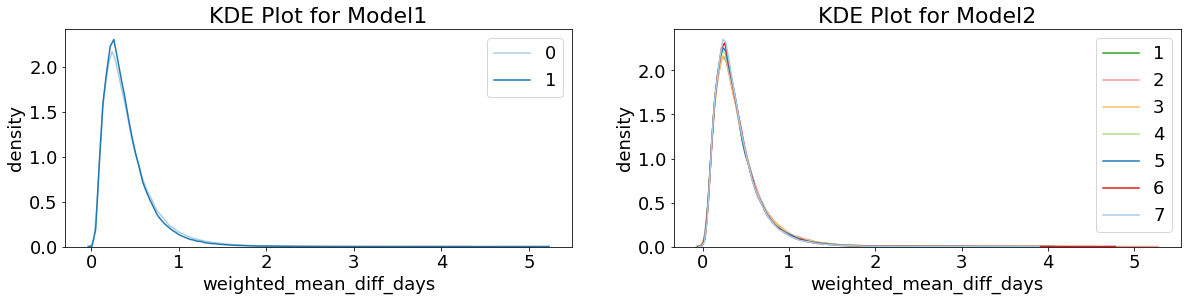

In [45]:
kdeplot(df_ml_train,df_ml_train_day,'weighted_mean_diff_days');

**Observation:** 

- As per the kdeplot, **weighted_mean_diff_days** do not carry much variation with respect to the output class and can be dropped

#### Visualizing : perc_conscecutive_visits

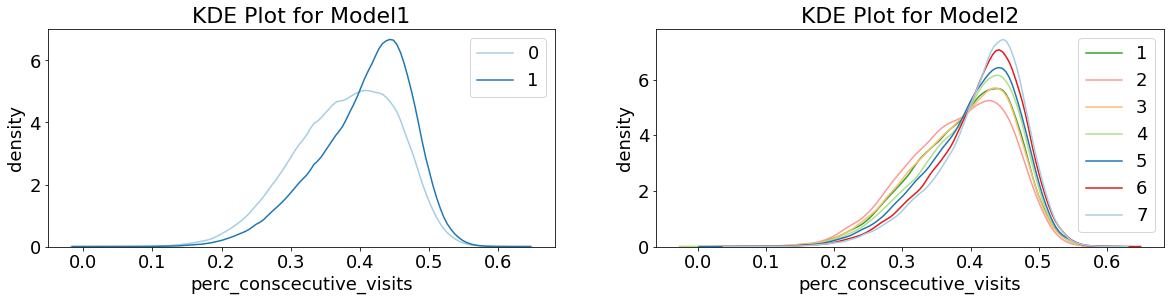

In [46]:
kdeplot(df_ml_train,df_ml_train_day,'perc_conscecutive_visits');

#### Visualizing mode_dow

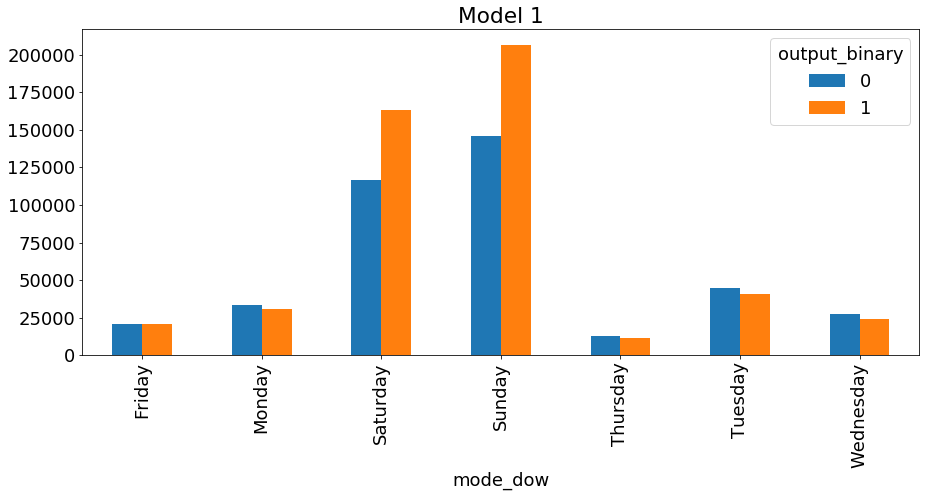

In [47]:
pd.crosstab(df_ml_train.mode_dow,df_ml_train.output_binary).plot.bar(title='Model 1');

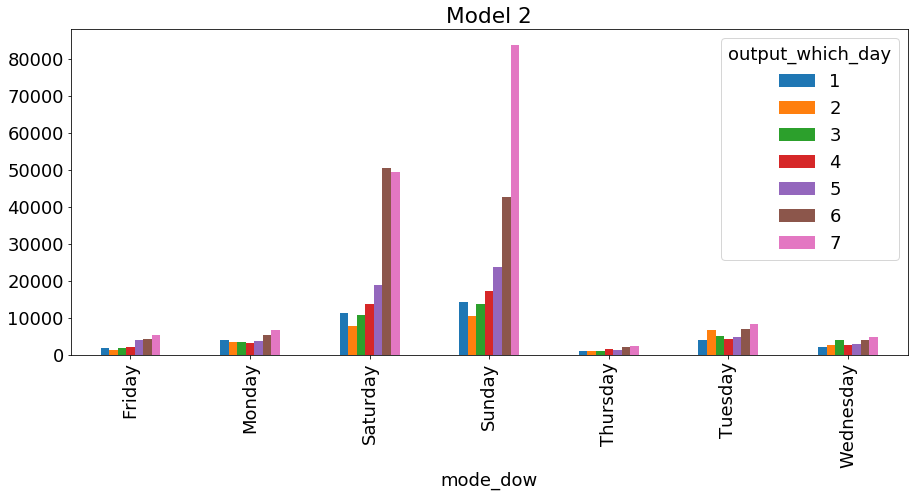

In [48]:
pd.crosstab(df_ml_train_day.mode_dow,df_ml_train_day.output_which_day).plot.bar(title='Model 2');

**Observation:** 

- There seems to be some noticeable difference in distribution on both the figures **make mode_dow** a good candiate for the model

#### Visualizing : last_visit_dow

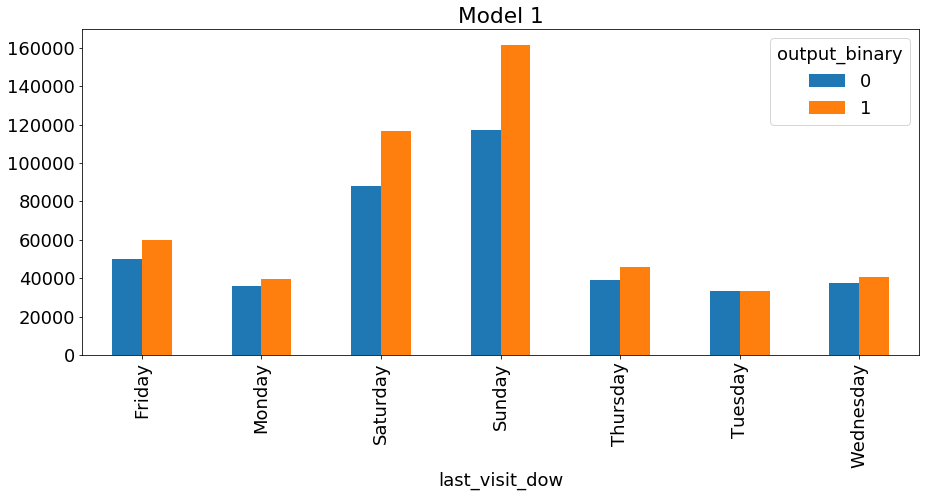

In [49]:
pd.crosstab(df_ml_train.last_visit_dow,df_ml_train.output_binary).plot.bar(title='Model 1');

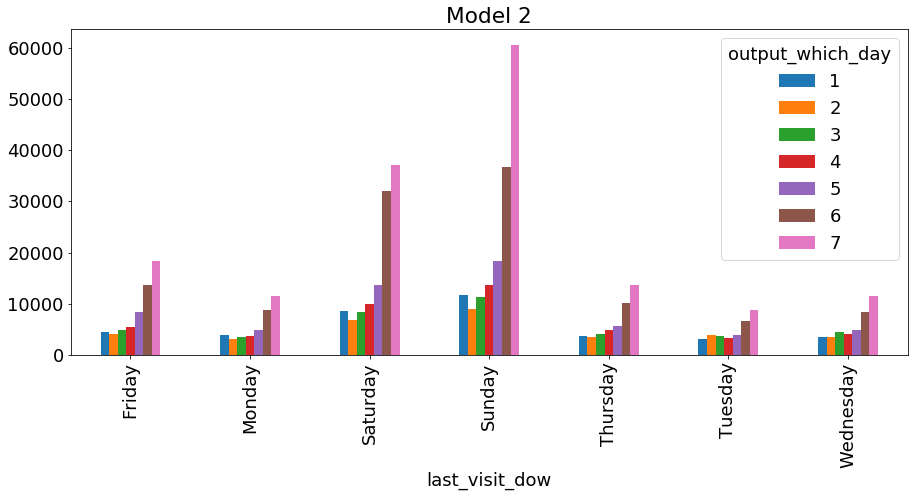

In [50]:
pd.crosstab(df_ml_train_day.last_visit_dow,df_ml_train_day.output_which_day).plot.bar(title='Model 2');

**Observation:** 
- last_visit_dow seems to be an important column for both the models

#### Visualizing : weighted_mean_diff_days_std

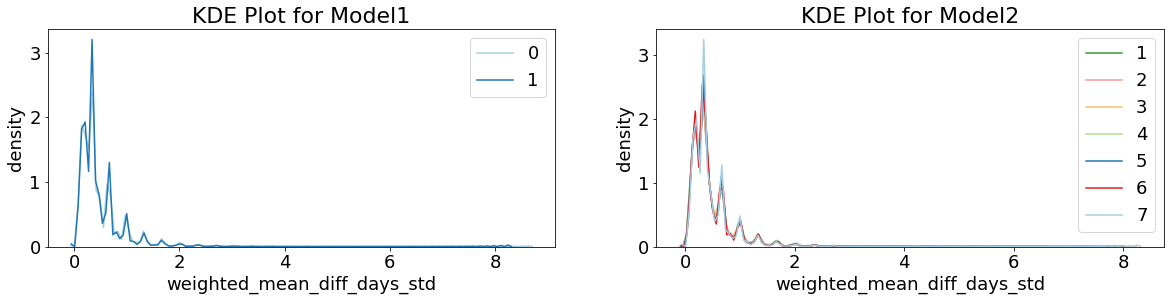

In [51]:
kdeplot(df_ml_train,df_ml_train_day,'weighted_mean_diff_days_std');

**Observation:** 

- Similar to **weighted_mean_diff_days**, this variable does not exhbits much variation with resepect to target class. We could probably drop this variable from the model.

#### Visualizing : mode_alternate_even_dow

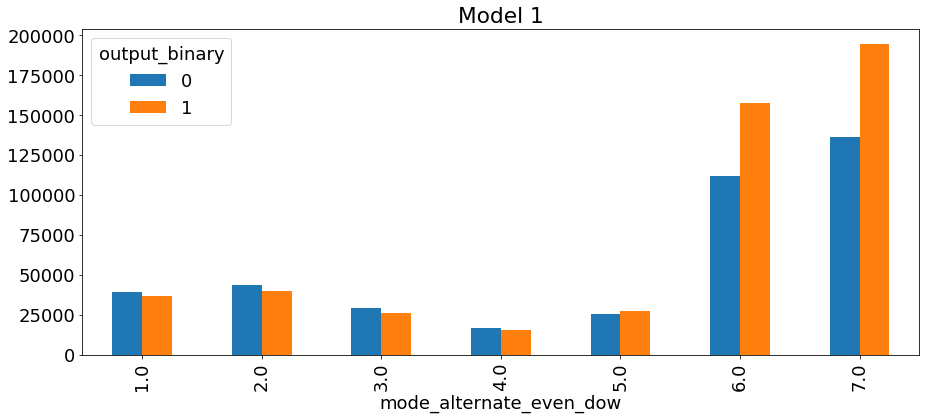

In [52]:
pd.crosstab(df_ml_train.mode_alternate_even_dow,df_ml_train.output_binary).plot.bar(title='Model 1');

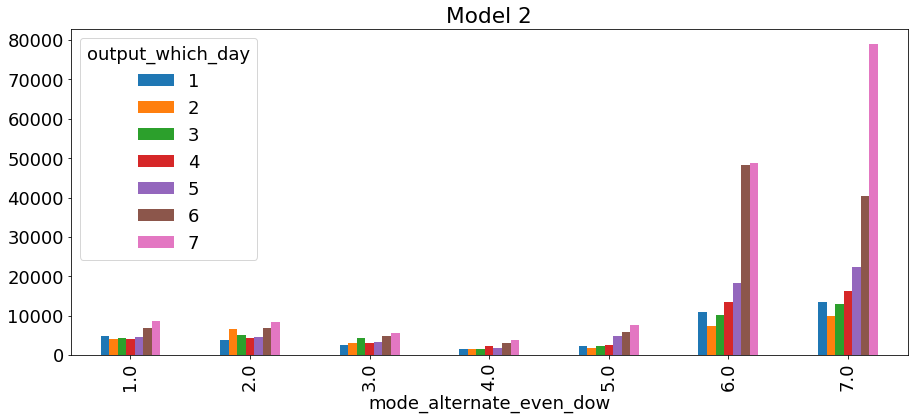

In [53]:
pd.crosstab(df_ml_train_day.mode_alternate_even_dow,df_ml_train_day.output_which_day).plot.bar(title='Model 2');

**Insight:** Seems to help the positive class in both the models 

### Visualizing : mode_alternate_odd_dow

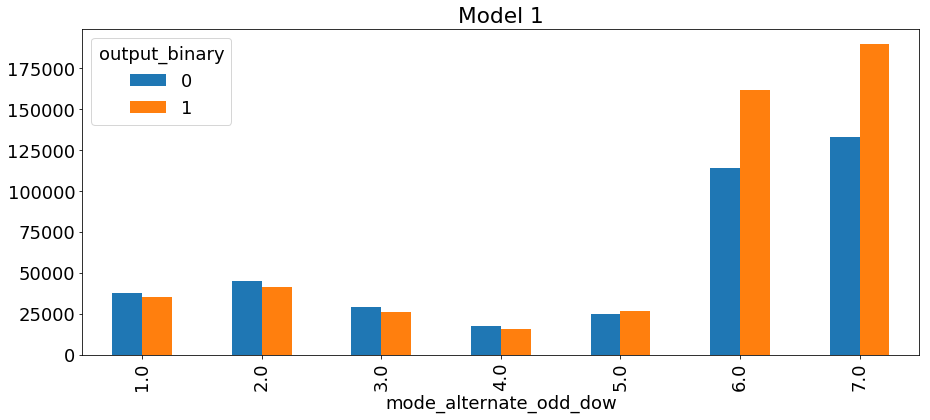

In [54]:
pd.crosstab(df_ml_train.mode_alternate_odd_dow,df_ml_train.output_binary).plot.bar(title='Model 1');

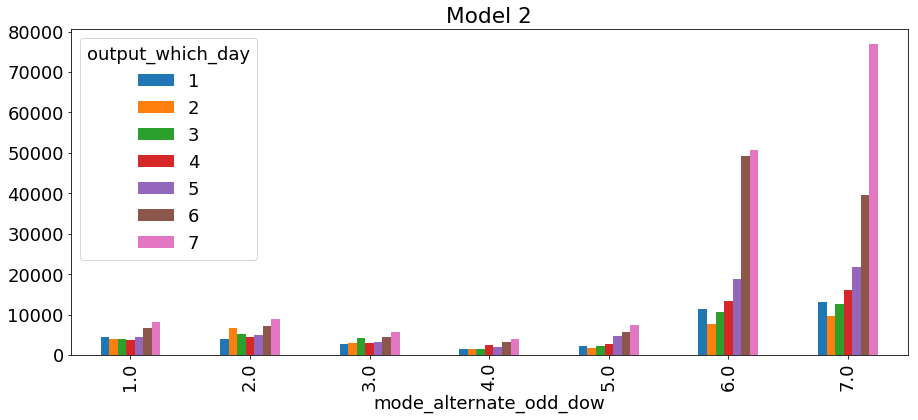

In [55]:
pd.crosstab(df_ml_train_day.mode_alternate_odd_dow,df_ml_train_day.output_which_day).plot.bar(title='Model 2');

**Insight:** Show similar characterstics as mode_alternate_even_dow

### Visualizing : count_visit_monday

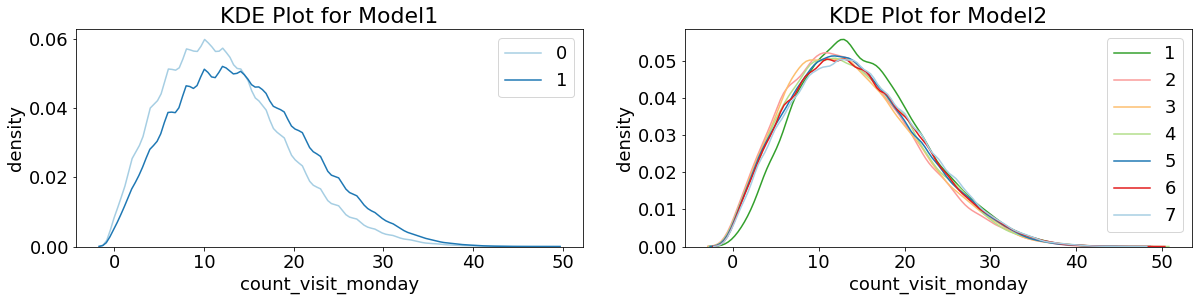

In [56]:
kdeplot(df_ml_train,df_ml_train_day,'count_visit_monday');

### Visualizing : count_visit_tuesday

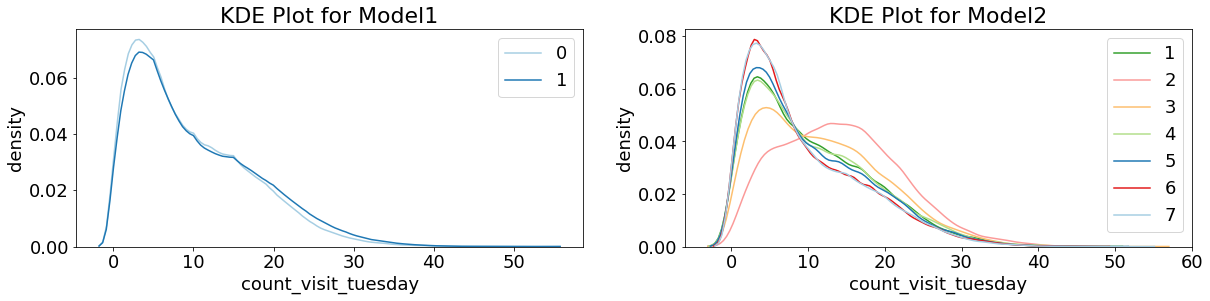

In [57]:
kdeplot(df_ml_train,df_ml_train_day,'count_visit_tuesday');

### Visualizing : count_visit_wednesday

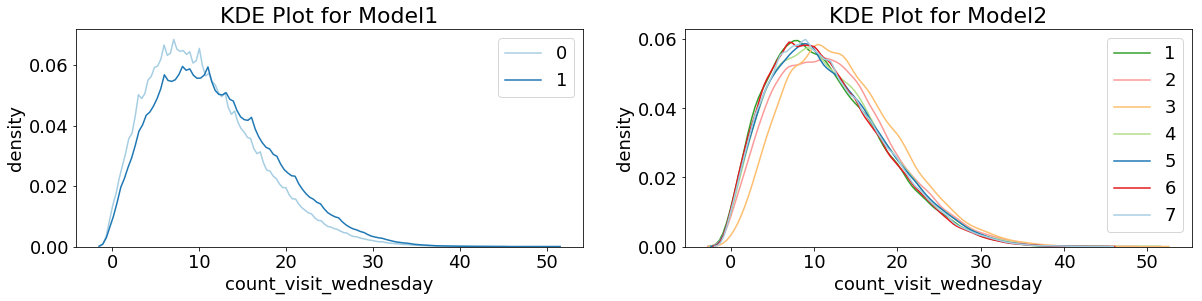

In [58]:
kdeplot(df_ml_train,df_ml_train_day,'count_visit_wednesday');

### Visualizing : count_visit_thursday

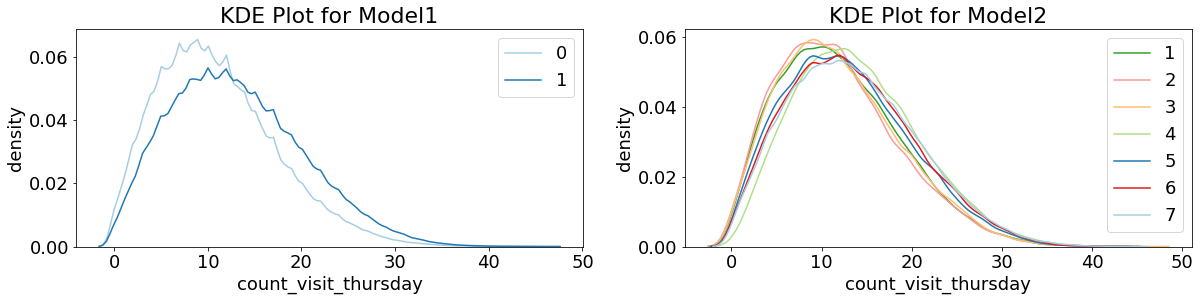

In [59]:
kdeplot(df_ml_train,df_ml_train_day,'count_visit_thursday');

### Visualizing : count_visit_friday

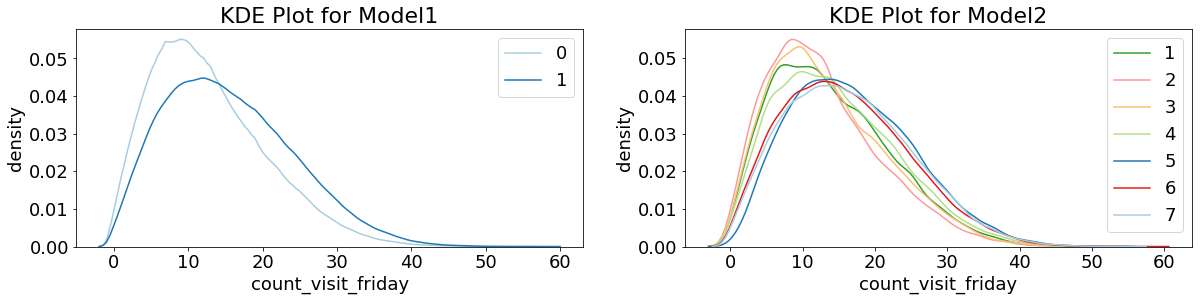

In [60]:
kdeplot(df_ml_train,df_ml_train_day,'count_visit_friday');

### Visualizing : count_visit_saturday

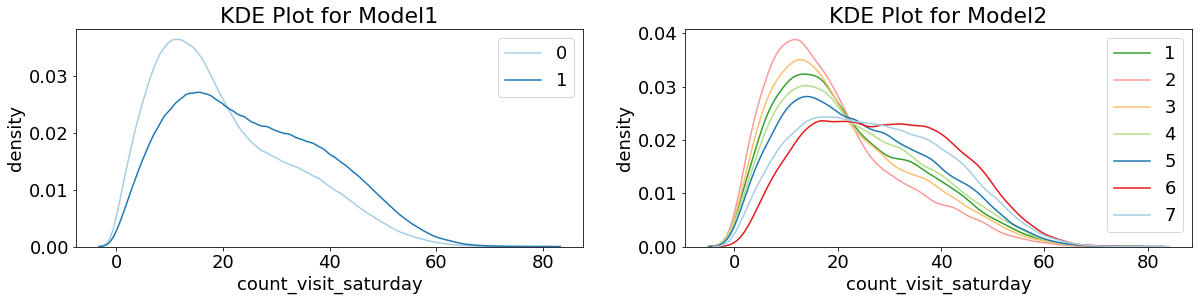

In [61]:
kdeplot(df_ml_train,df_ml_train_day,'count_visit_saturday');

#### visualizing : count_visit_sunday

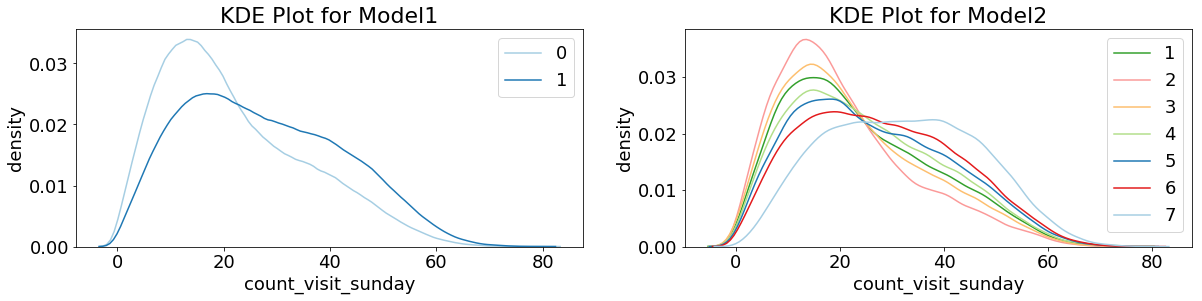

In [62]:
kdeplot(df_ml_train,df_ml_train_day,'count_visit_sunday');

## Machine Learning Modeling

#### Read input file 

In [2]:
train_file_path = os.path.join(os.curdir,'data', 'processed', 'df_ml_train.pkl')
df_formodel = pd.read_pickle(train_file_path)

#### One Hot Encoding

In [3]:
def hot_encode(odf):
    """To produce one hot encodings
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    DataFrame
   
    """
    categorical_features = [ x for x in odf.iloc[:,np.where(odf.dtypes == np.object)[0]].columns 
                            if x not in ['output_which_day','output_binary']]
    for feature in categorical_features:
        odf[feature] = odf[feature].astype(str)
    return pd.get_dummies(odf,columns=categorical_features)

In [4]:
df_ml = hot_encode(df_formodel)

#### Model Helper Functions:

In [13]:
def train_model(dataset, inputfeatures, target, algo, labels, print_results = True):
    """Returns Model object and prints evaluation metrics
   
    Args:
    dataset : Input dataset - should contain input features and target
    target : y variable
    algo : Classifier algorithm to be used
    params: params for parameter tuning
    labels: y variable labels
    """
    X = dataset[inputfeatures].values
    y = np.ravel(dataset[target].astype(str).values)
#     y = np.ravel(dataset[target].values)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)
    
    start_time = time.time()
    # Random Forest
    model = algo
    model.fit(X_train, y_train)
    
    if print_results:
        print("Number of input features used: %s \n" % (str(len(inputfeatures))))
        print("--------------------------------Model Building---------------------------------")
        print("Fitted %s \nExecution Time --- %s seconds ---" % (algo, time.time() - start_time))
    
        print("\n--------------------------------Model Evaluation-------------------------------")
        print("-----------------------------------TRAIN SET-----------------------------------")
        printmetrics(y_train, model.predict(X_train),labels)    
        print("-----------------------------------TEST SET------------------------------------")
        printmetrics(y_test, model.predict(X_test),labels)
        
    return model

def var_importance_plot(importance, input_features):
    indices = np.argsort(-importance)
    plt.subplots(1, figsize=(40, 4))
    g = sns.heatmap(importance[indices, np.newaxis].T, cmap='Reds', cbar=True, linewidths=1, annot=False)
    plt.yticks([], [])
    plt.gca().set_xticklabels([input_features[i] for i in indices], rotation=45, ha='right', fontsize=18)
    plt.suptitle("ExtraTreesClassifer Variable Importance", fontsize=18, y=1.2)
    plt.gcf().subplots_adjust(wspace=0.2)
    feature_importances = pd.DataFrame(importance,
                                   index = input_features,
                                    columns=['importance']).sort_values('importance',ascending=False) 
    return feature_importances




def plot_confusion_matrix(cm, labels ):
    """Plot CM
   
    Args:
    df : dataframe
    target_var : y variable
    
    """
    cmap=plt.cm.gist_yarg
    title='Confusion matrix'
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)


def printmetrics(yori, ypred,  labels):
    """Print Metrics
   
    Args:
    df : dataframe
    target_var : y variable
    
    """
    print(confusion_matrix(yori, ypred))
    print("Accuracy: " + str(accuracy_score(yori, ypred)))
    print("F1 Score: " + str(f1_score(yori, ypred, average="micro")))
    print("Precision: " + str(precision_score(yori, ypred, average="micro")))
    print("Recall: " + str(recall_score(yori, ypred, average="micro")))
    print("Classification Report:")
    print(classification_report(yori, ypred))
    plt.figure()
    plot_confusion_matrix(confusion_matrix(yori, ypred),labels=labels)

## Level 1 Model : Binary Classification

- Whether visitor will visit the target week or not - Output is binary where 1 being visitor will visit the target week and 0 being non event

### Baseline Model: Using DummyClassifier
DummyClassifier is a classifier that makes predictions using simple rules ( return majority class as output ).

Number of input features used: 84 

--------------------------------Model Building---------------------------------
Fitted DummyClassifier(constant=None, random_state=None, strategy='stratified') 
Execution Time --- 1.169684886932373 seconds ---

--------------------------------Model Evaluation-------------------------------
-----------------------------------TRAIN SET-----------------------------------
[[125684 155803]
 [155689 192824]]
Accuracy: 0.505568253968254
F1 Score: 0.505568253968254
Precision: 0.505568253968254
Recall: 0.505568253968254
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45    281487
           1       0.55      0.55      0.55    348513

   micro avg       0.51      0.51      0.51    630000
   macro avg       0.50      0.50      0.50    630000
weighted avg       0.51      0.51      0.51    630000

-----------------------------------TEST SET------------------------------------
[[53917 66678]
 [

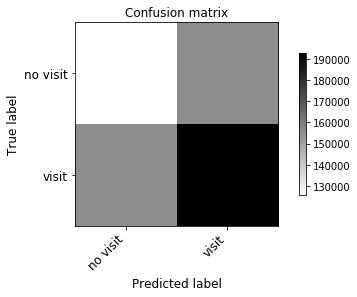

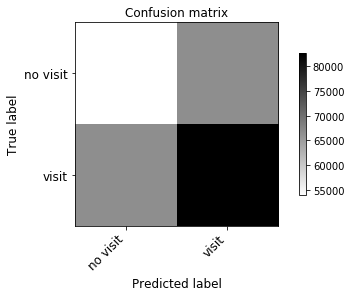

In [15]:
input_features = df_ml.loc[:, ~df_ml.columns.isin(['visitor_id','output_binary', 'output_which_day'])].columns
target = 'output_binary'
labels = ["no visit",'visit']
_ = train_model(df_ml, input_features, target, DummyClassifier(), None, labels)

**Observations** 

- Baseline Performance Metrics
    - Accuracy : 50%
    - F1-Score : 50%

### Model Feature Selection: Using Extra Trees Classifier
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

### Reducing collinear variables

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#################SR code
def calculate_vif(X, thresh=10.0):
    dropped=True
    while dropped:
        variables = X.columns
        dropped = False
        vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]

        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            X = X.drop([X.columns.tolist()[maxloc]], axis=1)
            dropped=True
    return X


input_features = df_ml.loc[:, ~df_ml.columns.isin(['visitor_id','output_binary', 'output_which_day'])].columns
df_ml = calculate_vif(df3[input_features], 15)

In [6]:
df_ml = df_ml[['count_consecutive_friday', 'count_consecutive_monday',
       'count_consecutive_saturday', 'count_consecutive_sunday',
       'count_consecutive_thursday', 'count_consecutive_tuesday',
       'count_consecutive_wednesday', 'count_visit_sameweek', 'recency_week',
       'weighted_mean_diff_days_std', 'last_2weeks_conscecutive_visit_Yes',
       'last_visit_dow_Monday', 'last_visit_dow_Saturday',
       'last_visit_dow_Sunday', 'last_visit_dow_Thursday',
       'last_visit_dow_Tuesday', 'last_visit_dow_Wednesday',
       'least_visit_dow_Monday', 'least_visit_dow_Saturday',
       'least_visit_dow_Sunday', 'least_visit_dow_Thursday',
       'least_visit_dow_Tuesday', 'least_visit_dow_Wednesday',
       'mode_dow_Monday', 'mode_dow_Saturday', 'mode_dow_Thursday',
       'mode_dow_Tuesday', 'mode_dow_Wednesday', 'mode_last12weeks_Monday',
       'mode_last12weeks_Saturday', 'mode_last12weeks_Thursday',
       'mode_last12weeks_Tuesday', 'mode_last12weeks_Wednesday',
       'mode_last3visits_Saturday', 'mode_last3visits_Sunday',
       'mode_last3visits_Thursday', 'mode_last3visits_Tuesday',
       'mode_last3visits_Wednesday', 'mode_last4weeks_Monday',
       'mode_last4weeks_Saturday', 'mode_last4weeks_Sunday',
       'mode_last4weeks_Thursday', 'mode_last4weeks_Tuesday',
       'mode_last4weeks_Wednesday', 'mode_last8weeks_Monday',
       'mode_last8weeks_Sunday', 'mode_last8weeks_Thursday',
       'mode_last8weeks_Tuesday', 'mode_last8weeks_Wednesday',
       'visit_sameweek_previousyears_No','max_consecutive_visitdow',
       'count_visit_monday','count_visit_wednesday',
'median_week_diff','count_visit_thursday',
'mode_dow_Sunday','count_visit_tuesday',
'mode_last8weeks_Saturday','mode_last3visits_Monday',
'mode_last12weeks_Sunday', 'visitor_id','output_binary', 'output_which_day'
             ]]

Input features used : Index(['count_consecutive_friday', 'count_consecutive_monday',
       'count_consecutive_saturday', 'count_consecutive_sunday',
       'count_consecutive_thursday', 'count_consecutive_tuesday',
       'count_consecutive_wednesday', 'count_visit_sameweek', 'recency_week',
       'weighted_mean_diff_days_std', 'last_2weeks_conscecutive_visit_Yes',
       'last_visit_dow_Monday', 'last_visit_dow_Saturday',
       'last_visit_dow_Sunday', 'last_visit_dow_Thursday',
       'last_visit_dow_Tuesday', 'last_visit_dow_Wednesday',
       'least_visit_dow_Monday', 'least_visit_dow_Saturday',
       'least_visit_dow_Sunday', 'least_visit_dow_Thursday',
       'least_visit_dow_Tuesday', 'least_visit_dow_Wednesday',
       'mode_dow_Monday', 'mode_dow_Saturday', 'mode_dow_Thursday',
       'mode_dow_Tuesday', 'mode_dow_Wednesday', 'mode_last12weeks_Monday',
       'mode_last12weeks_Saturday', 'mode_last12weeks_Thursday',
       'mode_last12weeks_Tuesday', 'mode_last12weeks_Wedn

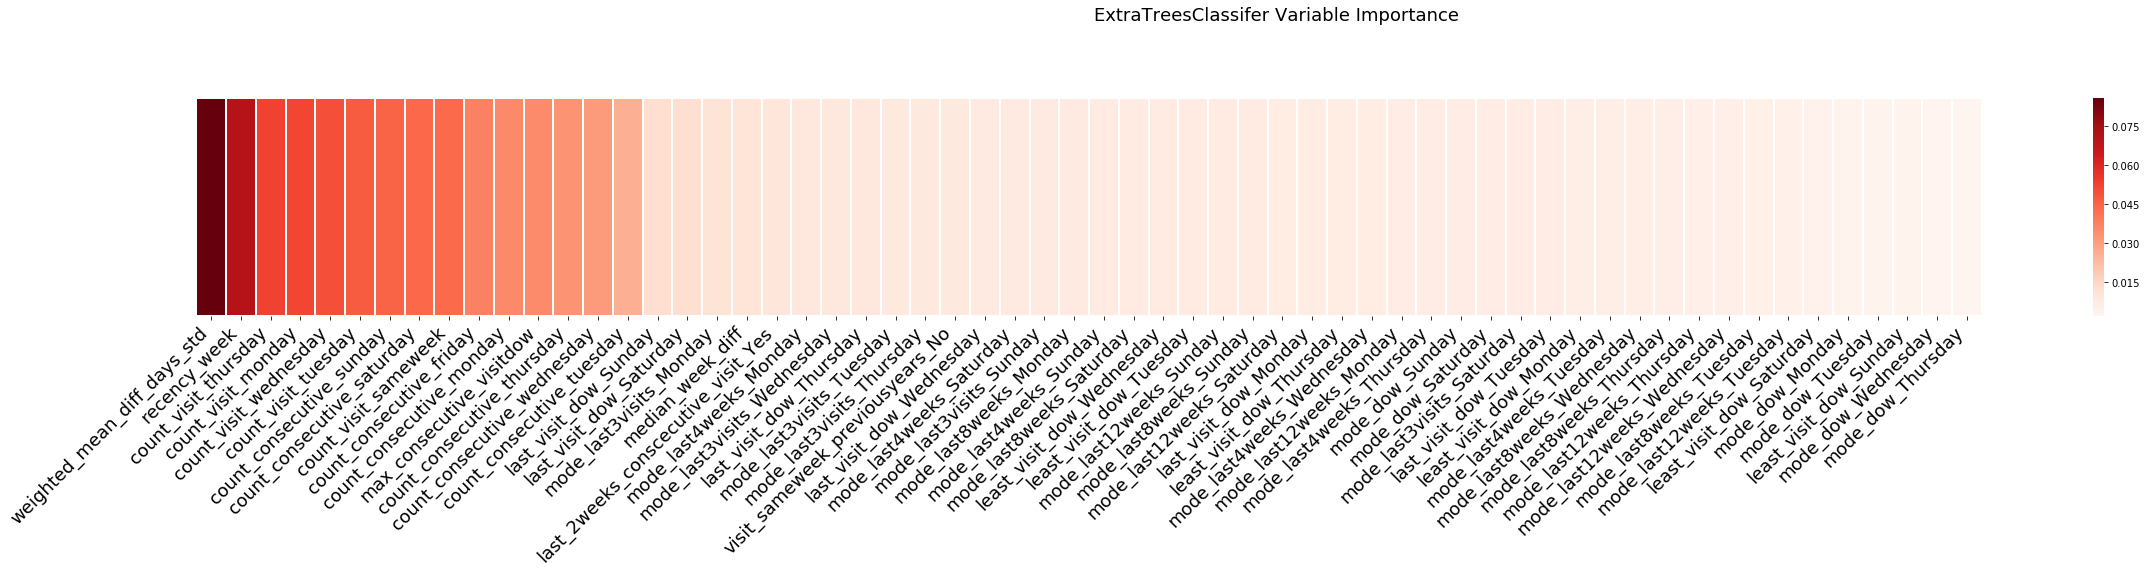

In [7]:
input_features = df_ml.loc[:, ~df_ml.columns.isin(['visitor_id','output_binary', 'output_which_day'])].columns
print("Input features used : {0}".format(input_features))
target = 'output_binary'
labels = ["no visit",'visit']
et = train_model(df_ml, input_features, target, ExtraTreesClassifier(n_estimators=50), None, labels, print_results = False )
df_imp = var_importance_plot(et.feature_importances_, input_features)
    

In [68]:
df_imp.index[:16]

Index(['weighted_mean_diff_days_std', 'recency_week', 'count_visit_thursday',
       'count_visit_monday', 'count_visit_wednesday', 'count_visit_tuesday',
       'count_consecutive_sunday', 'count_visit_sameweek',
       'count_consecutive_saturday', 'count_consecutive_friday',
       'max_consecutive_visitdow', 'count_consecutive_monday',
       'count_consecutive_thursday', 'count_consecutive_wednesday',
       'count_consecutive_tuesday', 'last_visit_dow_Sunday'],
      dtype='object')

**Observations** 

Top Features that contribute most towards prediction 

- weighted_mean_diff_days : weighted average of difference of days in visits 
- weighted_mean_diff_days_std : weighted standard deviation of difference of days in visits
- recency_day : how many days since the last visit to mall 
- recency_week : how many weeks since the last visit to mall
- visit_number : how many visits so far



### Model Building: Using Logistic Regresssion

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Number of input features used: 84 

--------------------------------Model Building---------------------------------
Fitted LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
Execution Time --- 43.044631004333496 seconds ---

--------------------------------Model Evaluation-------------------------------
-----------------------------------TRAIN SET-----------------------------------
[[146777 134710]
 [110195 238318]]
Accuracy: 0.6112619047619048
F1 Score: 0.6112619047619048
Precision: 0.6112619047619048
Recall: 0.6112619047619048
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.52      0.55    281487
           1       0.64      0.68      0.66    348513

   micro avg       0.61      0.61      0.61    630000
   macro a

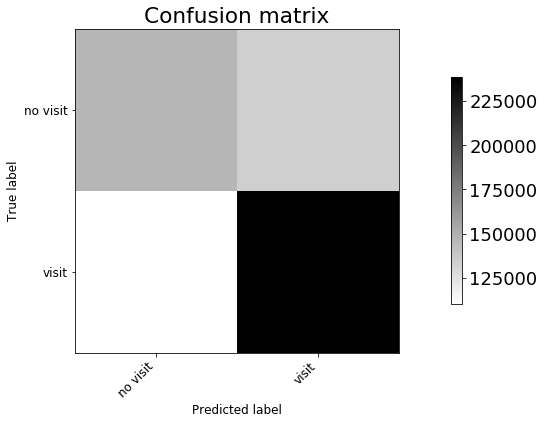

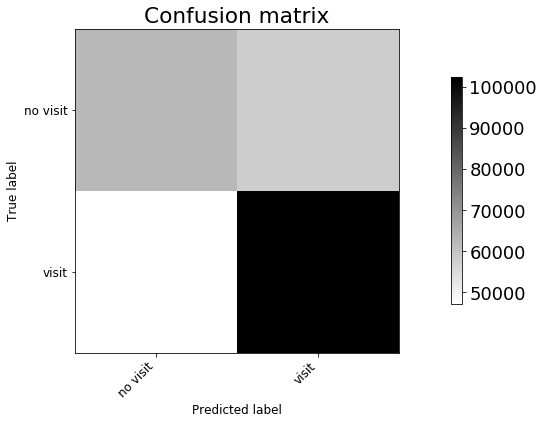

In [69]:
input_features_formodel1 = df_ml.loc[:, ~df_ml.columns.isin(['visitor_id','output_binary', 'output_which_day'])].columns
target = 'output_binary'
labels = ["no visit",'visit']
_ = train_model(df_ml, input_features_formodel1, target, LogisticRegression(), None, labels)


**Observations** 

- Performance Metrics on Test Dataset
    - Accuracy : 61%
    - F1-Score : 0.61

- Logistic Model seems to be doing better than baseline model with metrics closing to 60%
- However, we should try out  non linear algorithms such as Random Forest.


### Model Building : Using Random Forest

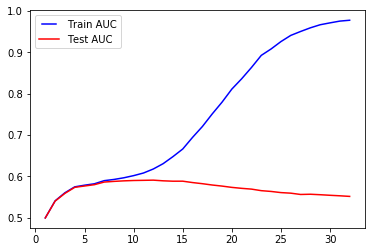

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel(‘AUC score’)
# plt.xlabel(‘Tree depth’)
plt.show()

In [11]:
X = df_ml[input_features_formodel1].values
# X = X[:400]
y = np.ravel(df_ml['output_binary'].values)
# y = y[:400]
#     y = np.ravel(dataset[target].values)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)

In [8]:
input_features_formodel1 = df_imp.index[:16]

In [89]:
X[:400].shape

(400, 16)

In [94]:
y_train

array(['0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1',
       '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0

In [ ]:
# input_features_formodel1 = df_ml.loc[:, ~df_ml.columns.isin(['visitor_id', 'output_binary', 'output_which_day'])].columns

input_features_formodel1 = df_imp.index[:16]
target = 'output_binary'
labels = ["no visit",'visit']
model1 = train_model(df_ml, input_features_formodel1, target, RandomForestClassifier(n_estimators=20, max_depth = 9), labels)


Number of input features used: 16 

--------------------------------Model Building---------------------------------
Fitted RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
Execution Time --- 28.130749940872192 seconds ---

--------------------------------Model Evaluation-------------------------------
-----------------------------------TRAIN SET-----------------------------------
[[133594 147893]
 [ 97994 250519]]
Accuracy: 0.6097031746031746
F1 Score: 0.6097031746031746
Precision: 0.6097031746031746


**Model Persistence**

- Persist the trained model so that it can be used later during final predictions

In [111]:
level_1_trained_model_path = os.path.join(os.curdir, 'models', 'level_1_model.pkl')
pickle.dump(model1, open(level_1_trained_model_path, 'wb'))

## Level 2 Model : Multi-Class Classification 

Predciting the day of visit for the visitor if the visitor will visit in the next week

In [73]:
# filter the training data where the visitor visited in the target week ( output column )
df_ml_emsem = df_ml[df_ml['output_binary'].astype(int) == 1]

In [74]:
# output label distribution
df_ml_emsem['output_which_day'].value_counts(normalize=True)*100

7.0    32.457955
6.0    23.373728
5.0    12.032905
4.0     9.177616
3.0     8.175443
1.0     7.914155
2.0     6.868199
Name: output_which_day, dtype: float64

**Observations** 

- From the above table it looks like weekend (saturday and sunday) are more than 50% of whole target variable. Clearly, the data is imbalaced and require us to deal with class imbalance

#### Resampling to deal with class imbalance 

In [75]:
# Separate majority and minority classes
df_upsampled = df_ml_emsem[df_ml_emsem.output_which_day == 7.0]
for each in df_ml_emsem.output_which_day.astype(int).unique():
    df_minority = df_ml_emsem[df_ml_emsem.output_which_day == each]
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=161941,    # to match majority class
                                     random_state=123) # reproducible results

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])
df_upsampled.output_which_day.value_counts(normalize=True)*100

7.0    24.981065
3.0    12.503156
6.0    12.503156
2.0    12.503156
1.0    12.503156
4.0    12.503156
5.0    12.503156
Name: output_which_day, dtype: float64

**Observations**

- Resampling has been performed to maintain the class imbalance

### Model Feature Selection: Using Extra Trees Classifier
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

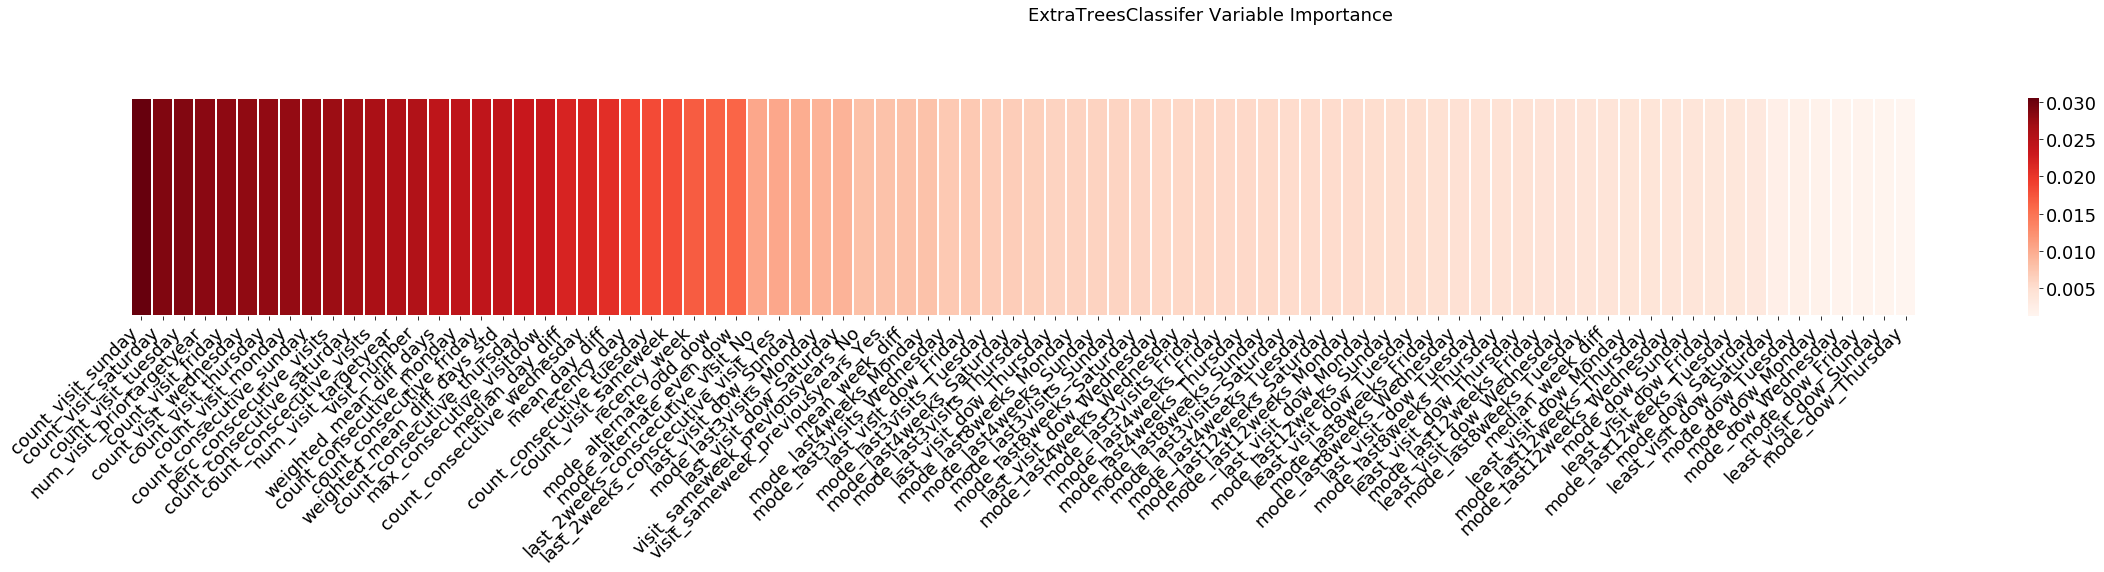

In [76]:
input_features_formodel2 = df_upsampled.loc[:, ~df_upsampled.columns.isin(['visitor_id','output_binary', 'output_which_day'])].columns
target = 'output_which_day'
et = train_model(df_upsampled, input_features_formodel2, target, ExtraTreesClassifier(n_estimators=50), None, labels, print_results = False )
var_importance_plot(et.feature_importances_, input_features)

**Observations**

- days specific features are the top features ( count_visit_sunday etc.)

### Model Building : Using Random Forest

Number of input features used: 84 

--------------------------------Model Building---------------------------------
Fitted RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
Execution Time --- 107.39186406135559 seconds ---

--------------------------------Model Evaluation-------------------------------
-----------------------------------TRAIN SET-----------------------------------
[[113268      0      0      0      0      0      1]
 [     0 113485      0      0      0      0      0]
 [     0      0 113436      0      0      0      0]
 [     0      0      0 113503      0      0      3]
 [     0      0      0      0 113

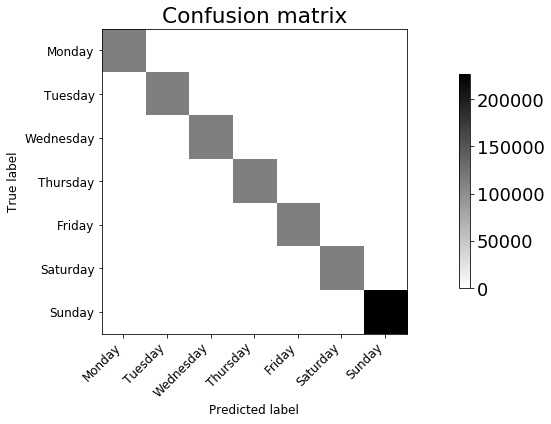

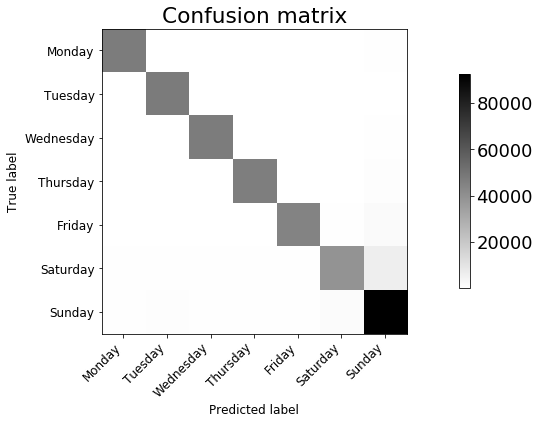

In [77]:
input_features_formodel2 = df_upsampled.loc[:, ~df_upsampled.columns.isin(['visitor_id','output_binary', 'output_which_day'])].columns
target = 'output_which_day'
labels = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',  'Sunday']
model2 = train_model(df_upsampled, input_features_formodel2, target, RandomForestClassifier(n_estimators=20), None, labels)

**Observations**

- Model is performing well for weekdays
- Model performance slightly degrades for weekends ( fails to distinguish betweeen saturday and sunday in few scenarios )

**Model Persistence**

- Persist the trained model so that it can be used later during final predictions

In [85]:
level_2_trained_model_path = os.path.join(os.curdir, 'models', 'level_2_model.pkl')
pickle.dump(model2, open(level_2_trained_model_path, 'wb'))

## Final Prediction pipeline

- Combining level 1 and level 2 model 

In [145]:
def load_models(level_1_file_path, level_2_file_path):
    level_1_model = pickle.load(open(level_1_file_path, 'rb'))
    level_2_model = pickle.load(open(level_2_trained_model_path, 'rb'))
    return level_1_model,level_2_model

def predict_pipeline(level_1_model,level_2_model, features_formodel1, features_formodel2, test_data_path, is_output_available = True):
    """Creates a pipeline to predict on unseen data
   
    Args:
    tuple : per visit tuple
    target_week : target value week
   
    Returns:
    Dictionary
   
    """
    # apply one-hot encoding on test data
    df_test = pd.read_pickle(test_data_path)
    
    
    df_input = df_test.loc[:, ~df_test.columns.isin(['visitor_id','output_binary', 'output_which_day'])]

    # input for level-1 model
    X = hot_encode(df_input)
    X = X[features_formodel1]

    # prediction from level - 1 model
    level_1_prediction = level_1_model.predict(X)
 

    
    # input for level-2 model  
    X = hot_encode(df_input)
    X = X[features_formodel2]

    # prediction from level - 2 model
    level_2_prediction = level_2_model.predict(X)

    
    # create dataframe with level-1 and level-2 predictions
    df_result = pd.DataFrame({'visitor_id':df_test['visitor_id'].values,
                              'level_1_prediction':level_1_prediction, 
                              'level_2_prediction':level_2_prediction } )
    
    df_result['level_1_prediction'] = df_result['level_1_prediction'].map(lambda x: int(x))
    df_result['level_2_prediction'] = df_result['level_2_prediction'].map(lambda x : int(float(x)))
    
    
    df_result['visit_target_week_predicted'] = np.where(df_result['level_1_prediction'] == 1, df_result['level_2_prediction'], 0)
    df_result = df_result[['visitor_id','visit_target_week_predicted']]
    
    
    if is_output_available:
        df_test['output_binary'] = df_test['output_binary'].map(lambda x: int(x))
        df_test['output_which_day'] = df_test['output_which_day'].map(lambda x : int(float(x)))
    
        df_result['visit_target_week_actual'] = np.where(df_test['output_binary']== 1, df_test['output_which_day'], 0)
        
        # calculate final model performance 
        labels = ['No Visit','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',  'Sunday']
        printmetrics(df_result['visit_target_week_actual'].values, df_result['visit_target_week_predicted'].values, labels )
        
    else:
        # create output file and generate visualizations 
        filepath = os.path.join(os.curdir, 'output', 'predictions', 'submission.csv')
        df_result.to_csv(filepath, index=False)
        df_result['visit_target_week_predicted'].value_counts().plot(kind='bar', rot=90)
        print('submission file written.')

#### Final Evaluation on Week 143

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


[[80111  3960  3663  3932  4185  5399  9369 23190]
 [ 6807  4651    61    63    45    75   246  1173]
 [ 6281    39  3956    50    32    64   127   694]
 [ 7043    52    84  4899    54    73   210  1115]
 [ 7279    65    89    69  5638   101   303  1553]
 [ 9293    84   100   124    97  7333   460  2379]
 [16687   226   295   285   286   516 13918  6967]
 [21633   133   174   169   154   294   961 30632]]
Accuracy: 0.5037933333333333
F1 Score: 0.5037933333333333
Precision: 0.5037933333333333
Recall: 0.5037933333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.60      0.55    133809
           1       0.50      0.35      0.42     13121
           2       0.47      0.35      0.40     11243
           3       0.51      0.36      0.42     13530
           4       0.54      0.37      0.44     15097
           5       0.53      0.37      0.43     19870
           6       0.54      0.36      0.43     39180
           7       0

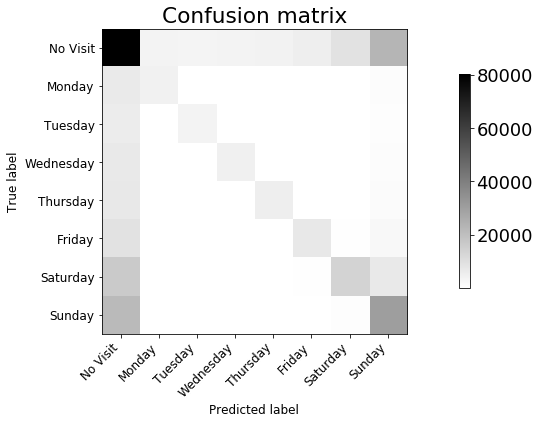

In [140]:
# Load Models 
level_1_trained_model_path = os.path.join(os.curdir, 'models', 'level_1_model.pkl')
level_2_trained_model_path = os.path.join(os.curdir, 'models', 'level_2_model.pkl')
level_1_model,level_2_model = load_models(level_1_trained_model_path, level_2_trained_model_path)

# run predict pipeline
test_data_path = os.path.join(os.curdir, 'data', 'processed','df_ml_final_evaluation.pkl')

predict_pipeline(level_1_model,level_2_model, input_features_formodel1, input_features_formodel2,test_data_path)

### Final Submission for Week 144

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


submission file written.


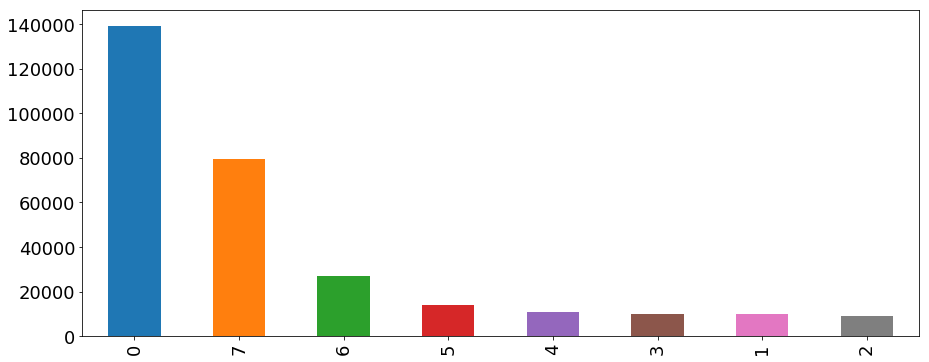

In [146]:
# Load Models 
level_1_trained_model_path = os.path.join(os.curdir, 'models', 'level_1_model.pkl')
level_2_trained_model_path = os.path.join(os.curdir, 'models', 'level_2_model.pkl')
level_1_model,level_2_model = load_models(level_1_trained_model_path, level_2_trained_model_path)

# run predict pipeline
test_data_path = os.path.join(os.curdir, 'data', 'processed','df_ml_submission.pkl')

predict_pipeline(level_1_model,level_2_model, input_features_formodel1, input_features_formodel2,test_data_path, False)

## Business Benefit and Future Roadmap 

The predictive model helps to identify visitors who would be visiting next week. This can be used for multiple activities :

- Operational Planning in the mall
    - organizing events
    - workforce planning
    - operation capacity planning ( AC settings, Power Consumption )
    - Parking price optimization 
- Coupons / Flyers / Discounts / event notification can be offered